<h1> Analysis extracted from the tool, in TestRTC, battery of tests starting on 08/07/2021 at 8:13:18PM</h1>

### Understanding the data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs

# loading data
df = pd.read_csv('./data/overt-month.csv')

In [181]:
print('Data regarding the first ten records\nNumber of probes used in the Stress test:',qtd_probes)
df.head(10)
qtd_probes = len(df)


Data regarding the first ten records
Number of probes used in the Stress test: 100


### Score Details

In [182]:
score_mean = df['score'].mean()
score_median = df['score'].median()
score_frequency = df['score'].mode()

print('Mean value score:',score_mean)
print('Core value score:',score_median)
print('frequency value score:',score_frequency)
print('Single Score Records:\n'+ str(df['score'].unique()))
#print('\nNumber of records per score:\n'+str(df['score'].value_counts()))

Mean value score: 8.049
Core value score: 8.1
frequency value score: 0    7.9
dtype: float64
Single Score Records:
[8.3 7.3 7.9 8.5 7.  8.6 8.4 7.4 8.2 8.7 6.9 7.8 8.8 8.1 7.7 8.  6.5]


#### Score min records

In [183]:
probe100  = df[df['score'] == 6.5]
probe100 

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
99,100,overt-month-100,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:57.020Z,166.542,2021-07-08T23:15:37.383Z,122.117,1.12,6.5,...,0 %,23880,3.33,0.04 %,2911.27,10236.0,3.75,18.84,21.74,31


In [184]:
# video data
# Packets
pb100_videoPackets_in = probe100['videoPackets_In']
pb100_videoPacketsLoss_in = probe100['videoPacketsLoss_In']
pb100_videoPacketsLossPercent_In = probe100['videoPacketsLossPercent_In']
pb100_videoPackets_out = probe100['videoPackets_Out']
pb100_videoPacketsLoss_out = probe100['videoPacketsLoss_Out']
pb100_videoPacketsLossPercent_out = probe100['videoPacketsLossPercent_Out'] 

# videoBitrate
pb100_videoBitrate_in = probe100['videoBitrate_In']
pb100_videoBitrate_out = probe100['videoBitrate_Out']
pb100_videoBitrate_in_Max = probe100['videoBitrate_In_Max']
pb100_videoBitrate_in_min = probe100['videoBitrate_In_Min']
pb100_videoBitrate_out_max = probe100['videoBitrate_Out_Max']
pb100_videoBitrate_out_min = probe100['videoBitrate_Out_Min']

# videoJitter
pb100_videoJitter_in = probe100['videoJitter_In']
pb100_videoJitter_in_max = probe100['videoJitter_In_Max']
pb100_videoJitter_out = probe100['videoJitter_Out']
pb100_videoJitter_out_max = probe100['videoJitter_Out_Max']

# videoRoundtrip 
pb100_videoRoundtrip = probe100['videoRoundtrip']
pb100_videoRoundtrip_Max = probe100['videoRoundtrip_Max']

# Audio Data
# Packets
pb100_audioPackets_in = probe100['audioPackets_In']
pb100_audioPacketsLoss_in = probe100['audioPacketsLoss_In']
pb100_audioPacketsLossPercent_in = probe100['audioPacketsLossPercent_In']
pb100_audioPackets_out = probe100['audioPackets_Out']
pb100_audioPacketsLoss_out = probe100['audioPacketsLoss_Out']
pb100_audioPacketsLossPercent_out = probe100['audioPacketsLossPercent_Out']

# audioBitrate
pb100_audioBitrate_In = probe100['audioBitrate_In']
pb100_audioBitrate_Out = probe100['audioBitrate_Out']
pb100_audioBitrate_in_max = probe100['audioBitrate_In_Max']
pb100_audioBitrate_in_min = probe100['audioBitrate_In_Min']
pb100_audioBitrate_out_max = probe100['audioBitrate_Out_Max']
pb100_audioBitrate_out_min = probe100['audioBitrate_Out_Min']

# audioJitter
pb100_audioJitter_in = probe100['audioJitter_In']
pb100_audioJitter_in_max = probe100['audioJitter_In_Max']
pb100_audioJitter_out = probe100['audioJitter_Out']
pb100_audioJitter_out_max = probe100['audioJitter_Out_Max']

# audioRoundtrip
pb100_audioRoundtrip = probe100['audioRoundtrip']
pb100_audioRoundtrip_max = probe100['audioRoundtrip_Max']

# session
pb100_inSessionIdx = probe100['inSessionIdx']
pb100_sessionNumber = probe100['sessionNumber']

<font color='red'> To analyze the min score it is necessary to analyze the data that makes up the session</fomt>

In [185]:
probe99 = df[df['Probe Name'] == 'overt-month-099']
probe99

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
98,99,overt-month-099,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:57.018Z,167.973,2021-07-08T23:15:38.417Z,121.985,0.0,7.3,...,0 %,27963,4.0,0.04 %,3107.3,11690.0,3.37,14.24,22.7,32


In [186]:
# video data
# Packets
pb99_videoPackets_in = probe99['videoPackets_In']
pb99_videoPacketsLoss_in = probe99['videoPacketsLoss_In']
pb99_videoPacketsLossPercent_In = probe99['videoPacketsLossPercent_In']
pb99_videoPackets_out = probe99['videoPackets_Out']
pb99_videoPacketsLoss_out = probe99['videoPacketsLoss_Out']
pb99_videoPacketsLossPercent_out = probe99['videoPacketsLossPercent_Out'] 

# videoBitrate
pb99_videoBitrate_in = probe99['videoBitrate_In']
pb99_videoBitrate_out = probe99['videoBitrate_Out']
pb99_videoBitrate_in_Max = probe99['videoBitrate_In_Max']
pb99_videoBitrate_in_min = probe99['videoBitrate_In_Min']
pb99_videoBitrate_out_max = probe99['videoBitrate_Out_Max']
pb99_videoBitrate_out_min = probe99['videoBitrate_Out_Min']

# videoJitter
pb99_videoJitter_in = probe99['videoJitter_In']
pb99_videoJitter_in_max = probe99['videoJitter_In_Max']
pb99_videoJitter_out = probe99['videoJitter_Out']
pb99_videoJitter_out_max = probe99['videoJitter_Out_Max']

# videoRoundtrip 
pb99_videoRoundtrip = probe99['videoRoundtrip']
pb99_videoRoundtrip_Max = probe99['videoRoundtrip_Max']

# Audio Data
# Packets
pb99_audioPackets_in = probe99['audioPackets_In']
pb99_audioPacketsLoss_in = probe99['audioPacketsLoss_In']
pb99_audioPacketsLossPercent_in = probe99['audioPacketsLossPercent_In']
pb99_audioPackets_out = probe99['audioPackets_Out']
pb99_audioPacketsLoss_out = probe99['audioPacketsLoss_Out']
pb99_audioPacketsLossPercent_out = probe99['audioPacketsLossPercent_Out']

# audioBitrate
pb99_audioBitrate_In = probe99['audioBitrate_In']
pb99_audioBitrate_Out = probe99['audioBitrate_Out']
pb99_audioBitrate_in_max = probe99['audioBitrate_In_Max']
pb99_audioBitrate_in_min = probe99['audioBitrate_In_Min']
pb99_audioBitrate_out_max = probe99['audioBitrate_Out_Max']
pb99_audioBitrate_out_min = probe99['audioBitrate_Out_Min']

# audioJitter
pb99_audioJitter_in = probe99['audioJitter_In']
pb99_audioJitter_in_max = probe99['audioJitter_In_Max']
pb99_audioJitter_out = probe99['audioJitter_Out']
pb99_audioJitter_out_max = probe99['audioJitter_Out_Max']

# audioRoundtrip
pb99_audioRoundtrip = probe99['audioRoundtrip']
pb99_audioRoundtrip_max = probe99['audioRoundtrip_Max']

# session
pb99_inSessionIdx = probe99['inSessionIdx']
pb99_sessionNumber = probe99['sessionNumber']

#### Score max records

In [187]:
probe25  = df[df['score'] == 8.8]
probe25 

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
24,25,overt-month-025,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.794Z,165.184,2021-07-08T23:15:34.470Z,123.023,2.06,8.8,...,0 %,34823,1.0,0.01 %,3192.21,10778.0,21.66,64.33,22.23,43


<font color='red'> To analyze the max score it is necessary to analyze the data that makes up the session</fomt>

In [188]:
# video data
# Packets
pb25_videoPackets_in = probe25['videoPackets_In']
pb25_videoPacketsLoss_in = probe25['videoPacketsLoss_In']
pb25_videoPacketsLossPercent_In = probe25['videoPacketsLossPercent_In']
pb25_videoPackets_out = probe25['videoPackets_Out']
pb25_videoPacketsLoss_out = probe25['videoPacketsLoss_Out']
pb25_videoPacketsLossPercent_out = probe25['videoPacketsLossPercent_Out'] 

# videoBitrate
pb25_videoBitrate_in = probe25['videoBitrate_In']
pb25_videoBitrate_out = probe25['videoBitrate_Out']
pb25_videoBitrate_in_Max = probe25['videoBitrate_In_Max']
pb25_videoBitrate_in_min = probe25['videoBitrate_In_Min']
pb25_videoBitrate_out_max = probe25['videoBitrate_Out_Max']
pb25_videoBitrate_out_min = probe25['videoBitrate_Out_Min']

# videoJitter
pb25_videoJitter_in = probe25['videoJitter_In']
pb25_videoJitter_in_max = probe25['videoJitter_In_Max']
pb25_videoJitter_out = probe25['videoJitter_Out']
pb25_videoJitter_out_max = probe25['videoJitter_Out_Max']

# videoRoundtrip 
pb25_videoRoundtrip = probe25['videoRoundtrip']
pb25_videoRoundtrip_Max = probe25['videoRoundtrip_Max']

# Audio Data
# Packets
pb25_audioPackets_in = probe25['audioPackets_In']
pb25_audioPacketsLoss_in = probe25['audioPacketsLoss_In']
pb25_audioPacketsLossPercent_in = probe25['audioPacketsLossPercent_In']
pb25_audioPackets_out = probe25['audioPackets_Out']
pb25_audioPacketsLoss_out = probe25['audioPacketsLoss_Out']
pb25_audioPacketsLossPercent_out = probe25['audioPacketsLossPercent_Out']

# audioBitrate
pb25_audioBitrate_In = probe25['audioBitrate_In']
pb25_audioBitrate_Out = probe25['audioBitrate_Out']
pb25_audioBitrate_in_max = probe25['audioBitrate_In_Max']
pb25_audioBitrate_in_min = probe25['audioBitrate_In_Min']
pb25_audioBitrate_out_max = probe25['audioBitrate_Out_Max']
pb25_audioBitrate_out_min = probe25['audioBitrate_Out_Min']

# audioJitter
pb25_audioJitter_in = probe25['audioJitter_In']
pb25_audioJitter_in_max = probe25['audioJitter_In_Max']
pb25_audioJitter_out = probe25['audioJitter_Out']
pb25_audioJitter_out_max = probe25['audioJitter_Out_Max']

# audioRoundtrip
pb25_audioRoundtrip = probe25['audioRoundtrip']
pb25_audioRoundtrip_max = probe25['audioRoundtrip_Max']

# session
pb25_inSessionIdx = probe25['inSessionIdx']
pb25_sessionNumber = probe25['sessionNumber']

In [189]:
probe26 = df[df['Probe Name'] == 'overt-month-026']
probe26

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
25,26,overt-month-026,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.795Z,166.711,2021-07-08T23:15:35.266Z,124.002,1.0,7.8,...,0 %,28758,1.0,0.01 %,4826.72,14236.0,3.71,13.67,22.46,39


In [190]:
# video data
# Packets
pb26_videoPackets_in = probe26['videoPackets_In']
pb26_videoPacketsLoss_in = probe26['videoPacketsLoss_In']
pb26_videoPacketsLossPercent_In = probe26['videoPacketsLossPercent_In']
pb26_videoPackets_out = probe26['videoPackets_Out']
pb26_videoPacketsLoss_out = probe26['videoPacketsLoss_Out']
pb26_videoPacketsLossPercent_out = probe26['videoPacketsLossPercent_Out'] 

# videoBitrate
pb26_videoBitrate_in = probe26['videoBitrate_In']
pb26_videoBitrate_out = probe26['videoBitrate_Out']
pb26_videoBitrate_in_Max = probe26['videoBitrate_In_Max']
pb26_videoBitrate_in_min = probe26['videoBitrate_In_Min']
pb26_videoBitrate_out_max = probe26['videoBitrate_Out_Max']
pb26_videoBitrate_out_min = probe26['videoBitrate_Out_Min']

# videoJitter
pb26_videoJitter_in = probe26['videoJitter_In']
pb26_videoJitter_in_max = probe26['videoJitter_In_Max']
pb26_videoJitter_out = probe26['videoJitter_Out']
pb26_videoJitter_out_max = probe26['videoJitter_Out_Max']

# videoRoundtrip 
pb26_videoRoundtrip = probe26['videoRoundtrip']
pb26_videoRoundtrip_Max = probe26['videoRoundtrip_Max']

# Audio Data
# Packets
pb26_audioPackets_in = probe26['audioPackets_In']
pb26_audioPacketsLoss_in = probe26['audioPacketsLoss_In']
pb26_audioPacketsLossPercent_in = probe26['audioPacketsLossPercent_In']
pb26_audioPackets_out = probe26['audioPackets_Out']
pb26_audioPacketsLoss_out = probe26['audioPacketsLoss_Out']
pb26_audioPacketsLossPercent_out = probe26['audioPacketsLossPercent_Out']

# audioBitrate
pb26_audioBitrate_In = probe26['audioBitrate_In']
pb26_audioBitrate_Out = probe26['audioBitrate_Out']
pb26_audioBitrate_in_max = probe26['audioBitrate_In_Max']
pb26_audioBitrate_in_min = probe26['audioBitrate_In_Min']
pb26_audioBitrate_out_max = probe26['audioBitrate_Out_Max']
pb26_audioBitrate_out_min = probe26['audioBitrate_Out_Min']

# audioJitter
pb26_audioJitter_in = probe26['audioJitter_In']
pb26_audioJitter_in_max = probe26['audioJitter_In_Max']
pb26_audioJitter_out = probe26['audioJitter_Out']
pb26_audioJitter_out_max = probe26['audioJitter_Out_Max']

# audioRoundtrip
pb26_audioRoundtrip = probe26['audioRoundtrip']
pb26_audioRoundtrip_max = probe26['audioRoundtrip_Max']

# session
pb26_inSessionIdx = probe26['inSessionIdx']
pb26_sessionNumber = probe26['sessionNumber']

#### Core value score:

In [191]:
probe = df[df['score'] == 8.1]
probe 

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
27,28,overt-month-028,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.802Z,171.761,2021-07-08T23:15:42.055Z,122.439,4.44,8.1,...,0 %,27655,0.67,0.01 %,4004.08,12165.0,10.14,32.10,22.76,34
42,43,overt-month-043,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.878Z,168.283,2021-07-08T23:15:36.138Z,125.001,2.01,8.1,...,0 %,24770,0.33,0.00 %,3378.21,10888.0,9.61,38.24,22.28,34
46,47,overt-month-047,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.887Z,165.507,2021-07-08T23:15:35.112Z,122.996,4.00,8.1,...,0 %,27124,1.33,0.01 %,3182.51,14739.0,3.83,18.11,22.53,39
47,48,overt-month-048,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.889Z,168.629,2021-07-08T23:15:36.044Z,126.000,2.95,8.1,...,0 %,28352,1.67,0.02 %,3214.76,8485.0,3.44,11.83,21.84,32
52,53,overt-month-053,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.896Z,165.283,2021-07-08T23:15:34.499Z,123.025,2.03,8.1,...,0 %,25880,2.00,0.02 %,3975.45,12650.0,21.82,54.83,22.11,50
63,64,overt-month-064,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.911Z,169.723,2021-07-08T23:15:34.082Z,126.000,1.97,8.1,...,0 %,28049,4.00,0.04 %,5313.53,15123.0,9.51,34.88,21.71,32
78,79,overt-month-079,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.985Z,176.044,2021-07-08T23:15:46.774Z,122.662,4.66,8.1,...,0 %,28568,2.67,0.03 %,3803.61,13659.0,3.88,14.10,23.32,51
87,88,overt-month-088,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.999Z,166.786,2021-07-08T23:15:33.402Z,126.000,3.99,8.1,...,0 %,24455,0.00,0 %,3553.20,11049.0,22.79,57.02,23.25,37


<font color='red'> To analyze the core value score it is necessary to analyze the data that makes up the session</fomt>

In [192]:
probe27 = df[df['Probe Name'] == 'overt-month-027']
probe27

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
26,27,overt-month-027,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.800Z,176.597,2021-07-08T23:15:42.761Z,126.007,3.17,8.2,...,0 %,26948,0.33,0.00 %,3283.85,10435.0,11.14,40.69,25.2,288


In [193]:
# video data
# Packets
pb27_videoPackets_in = probe27['videoPackets_In']
pb27_videoPacketsLoss_in = probe27['videoPacketsLoss_In']
pb27_videoPacketsLossPercent_In = probe27['videoPacketsLossPercent_In']
pb27_videoPackets_out = probe27['videoPackets_Out']
pb27_videoPacketsLoss_out = probe27['videoPacketsLoss_Out']
pb27_videoPacketsLossPercent_out = probe27['videoPacketsLossPercent_Out'] 

# videoBitrate
pb27_videoBitrate_in = probe27['videoBitrate_In']
pb27_videoBitrate_out = probe27['videoBitrate_Out']
pb27_videoBitrate_in_Max = probe27['videoBitrate_In_Max']
pb27_videoBitrate_in_min = probe27['videoBitrate_In_Min']
pb27_videoBitrate_out_max = probe27['videoBitrate_Out_Max']
pb27_videoBitrate_out_min = probe27['videoBitrate_Out_Min']

# videoJitter
pb27_videoJitter_in = probe27['videoJitter_In']
pb27_videoJitter_in_max = probe27['videoJitter_In_Max']
pb27_videoJitter_out = probe27['videoJitter_Out']
pb27_videoJitter_out_max = probe27['videoJitter_Out_Max']

# videoRoundtrip 
pb27_videoRoundtrip = probe27['videoRoundtrip']
pb27_videoRoundtrip_Max = probe27['videoRoundtrip_Max']

# Audio Data
# Packets
pb27_audioPackets_in = probe27['audioPackets_In']
pb27_audioPacketsLoss_in = probe27['audioPacketsLoss_In']
pb27_audioPacketsLossPercent_in = probe27['audioPacketsLossPercent_In']
pb27_audioPackets_out = probe27['audioPackets_Out']
pb27_audioPacketsLoss_out = probe27['audioPacketsLoss_Out']
pb27_audioPacketsLossPercent_out = probe27['audioPacketsLossPercent_Out']

# audioBitrate
pb27_audioBitrate_In = probe27['audioBitrate_In']
pb27_audioBitrate_Out = probe27['audioBitrate_Out']
pb27_audioBitrate_in_max = probe27['audioBitrate_In_Max']
pb27_audioBitrate_in_min = probe27['audioBitrate_In_Min']
pb27_audioBitrate_out_max = probe27['audioBitrate_Out_Max']
pb27_audioBitrate_out_min = probe27['audioBitrate_Out_Min']

# audioJitter
pb27_audioJitter_in = probe27['audioJitter_In']
pb27_audioJitter_in_max = probe27['audioJitter_In_Max']
pb27_audioJitter_out = probe27['audioJitter_Out']
pb27_audioJitter_out_max = probe27['audioJitter_Out_Max']

# audioRoundtrip
pb27_audioRoundtrip = probe27['audioRoundtrip']
pb27_audioRoundtrip_max = probe27['audioRoundtrip_Max']

# session
pb27_inSessionIdx = probe27['inSessionIdx']
pb27_sessionNumber = probe27['sessionNumber']

In [194]:
probe28 = df[df['Probe Name'] == 'overt-month-028']

# video data
# Packets
pb28_videoPackets_in = probe28['videoPackets_In']
pb28_videoPacketsLoss_in = probe28['videoPacketsLoss_In']
pb28_videoPacketsLossPercent_In = probe28['videoPacketsLossPercent_In']
pb28_videoPackets_out = probe28['videoPackets_Out']
pb28_videoPacketsLoss_out = probe28['videoPacketsLoss_Out']
pb28_videoPacketsLossPercent_out = probe28['videoPacketsLossPercent_Out'] 

# videoBitrate
pb28_videoBitrate_in = probe28['videoBitrate_In']
pb28_videoBitrate_out = probe28['videoBitrate_Out']
pb28_videoBitrate_in_Max = probe28['videoBitrate_In_Max']
pb28_videoBitrate_in_min = probe28['videoBitrate_In_Min']
pb28_videoBitrate_out_max = probe28['videoBitrate_Out_Max']
pb28_videoBitrate_out_min = probe28['videoBitrate_Out_Min']

# videoJitter
pb28_videoJitter_in = probe28['videoJitter_In']
pb28_videoJitter_in_max = probe28['videoJitter_In_Max']
pb28_videoJitter_out = probe28['videoJitter_Out']
pb28_videoJitter_out_max = probe28['videoJitter_Out_Max']

# videoRoundtrip 
pb28_videoRoundtrip = probe28['videoRoundtrip']
pb28_videoRoundtrip_Max = probe28['videoRoundtrip_Max']

# Audio Data
# Packets
pb28_audioPackets_in = probe28['audioPackets_In']
pb28_audioPacketsLoss_in = probe28['audioPacketsLoss_In']
pb28_audioPacketsLossPercent_in = probe28['audioPacketsLossPercent_In']
pb28_audioPackets_out = probe28['audioPackets_Out']
pb28_audioPacketsLoss_out = probe28['audioPacketsLoss_Out']
pb28_audioPacketsLossPercent_out = probe28['audioPacketsLossPercent_Out']

# audioBitrate
pb28_audioBitrate_In = probe28['audioBitrate_In']
pb28_audioBitrate_Out = probe28['audioBitrate_Out']
pb28_audioBitrate_in_max = probe28['audioBitrate_In_Max']
pb28_audioBitrate_in_min = probe28['audioBitrate_In_Min']
pb28_audioBitrate_out_max = probe28['audioBitrate_Out_Max']
pb28_audioBitrate_out_min = probe28['audioBitrate_Out_Min']

# audioJitter
pb28_audioJitter_in = probe28['audioJitter_In']
pb28_audioJitter_in_max = probe28['audioJitter_In_Max']
pb28_audioJitter_out = probe28['audioJitter_Out']
pb28_audioJitter_out_max = probe28['audioJitter_Out_Max']

# audioRoundtrip
pb28_audioRoundtrip = probe28['audioRoundtrip']
pb28_audioRoundtrip_max = probe28['audioRoundtrip_Max']

# session
pb28_inSessionIdx = probe28['inSessionIdx']
pb28_sessionNumber = probe28['sessionNumber']

In [195]:
probe43 = df[df['Probe Name'] == 'overt-month-043']

# video data
# Packets
pb43_videoPackets_in = probe43['videoPackets_In']
pb43_videoPacketsLoss_in = probe43['videoPacketsLoss_In']
pb43_videoPacketsLossPercent_In = probe43['videoPacketsLossPercent_In']
pb43_videoPackets_out = probe43['videoPackets_Out']
pb43_videoPacketsLoss_out = probe43['videoPacketsLoss_Out']
pb43_videoPacketsLossPercent_out = probe43['videoPacketsLossPercent_Out'] 

# videoBitrate
pb43_videoBitrate_in = probe43['videoBitrate_In']
pb43_videoBitrate_out = probe43['videoBitrate_Out']
pb43_videoBitrate_in_Max = probe43['videoBitrate_In_Max']
pb43_videoBitrate_in_min = probe43['videoBitrate_In_Min']
pb43_videoBitrate_out_max = probe43['videoBitrate_Out_Max']
pb43_videoBitrate_out_min = probe43['videoBitrate_Out_Min']

# videoJitter
pb43_videoJitter_in = probe43['videoJitter_In']
pb43_videoJitter_in_max = probe43['videoJitter_In_Max']
pb43_videoJitter_out = probe43['videoJitter_Out']
pb43_videoJitter_out_max = probe43['videoJitter_Out_Max']

# videoRoundtrip 
pb43_videoRoundtrip = probe43['videoRoundtrip']
pb43_videoRoundtrip_Max = probe43['videoRoundtrip_Max']

# Audio Data
# Packets
pb43_audioPackets_in = probe43['audioPackets_In']
pb43_audioPacketsLoss_in = probe43['audioPacketsLoss_In']
pb43_audioPacketsLossPercent_in = probe43['audioPacketsLossPercent_In']
pb43_audioPackets_out = probe43['audioPackets_Out']
pb43_audioPacketsLoss_out = probe43['audioPacketsLoss_Out']
pb43_audioPacketsLossPercent_out = probe43['audioPacketsLossPercent_Out']

# audioBitrate
pb43_audioBitrate_In = probe43['audioBitrate_In']
pb43_audioBitrate_Out = probe43['audioBitrate_Out']
pb43_audioBitrate_in_max = probe43['audioBitrate_In_Max']
pb43_audioBitrate_in_min = probe43['audioBitrate_In_Min']
pb43_audioBitrate_out_max = probe43['audioBitrate_Out_Max']
pb43_audioBitrate_out_min = probe43['audioBitrate_Out_Min']

# audioJitter
pb43_audioJitter_in = probe43['audioJitter_In']
pb43_audioJitter_in_max = probe43['audioJitter_In_Max']
pb43_audioJitter_out = probe43['audioJitter_Out']
pb43_audioJitter_out_max = probe43['audioJitter_Out_Max']

# audioRoundtrip
pb43_audioRoundtrip = probe43['audioRoundtrip']
pb43_audioRoundtrip_max = probe43['audioRoundtrip_Max']

# session
pb43_inSessionIdx = probe43['inSessionIdx']
pb43_sessionNumber = probe43['sessionNumber']

In [196]:
probe44 = df[df['Probe Name'] == 'overt-month-044']

# video data
# Packets
pb44_videoPackets_in = probe44['videoPackets_In']
pb44_videoPacketsLoss_in = probe44['videoPacketsLoss_In']
pb44_videoPacketsLossPercent_In = probe44['videoPacketsLossPercent_In']
pb44_videoPackets_out = probe44['videoPackets_Out']
pb44_videoPacketsLoss_out = probe44['videoPacketsLoss_Out']
pb44_videoPacketsLossPercent_out = probe44['videoPacketsLossPercent_Out'] 

# videoBitrate
pb44_videoBitrate_in = probe44['videoBitrate_In']
pb44_videoBitrate_out = probe44['videoBitrate_Out']
pb44_videoBitrate_in_Max = probe44['videoBitrate_In_Max']
pb44_videoBitrate_in_min = probe44['videoBitrate_In_Min']
pb44_videoBitrate_out_max = probe44['videoBitrate_Out_Max']
pb44_videoBitrate_out_min = probe44['videoBitrate_Out_Min']

# videoJitter
pb44_videoJitter_in = probe44['videoJitter_In']
pb44_videoJitter_in_max = probe44['videoJitter_In_Max']
pb44_videoJitter_out = probe44['videoJitter_Out']
pb44_videoJitter_out_max = probe44['videoJitter_Out_Max']

# videoRoundtrip 
pb44_videoRoundtrip = probe44['videoRoundtrip']
pb44_videoRoundtrip_Max = probe44['videoRoundtrip_Max']

# Audio Data
# Packets
pb44_audioPackets_in = probe44['audioPackets_In']
pb44_audioPacketsLoss_in = probe44['audioPacketsLoss_In']
pb44_audioPacketsLossPercent_in = probe44['audioPacketsLossPercent_In']
pb44_audioPackets_out = probe44['audioPackets_Out']
pb44_audioPacketsLoss_out = probe44['audioPacketsLoss_Out']
pb44_audioPacketsLossPercent_out = probe44['audioPacketsLossPercent_Out']

# audioBitrate
pb44_audioBitrate_In = probe44['audioBitrate_In']
pb44_audioBitrate_Out = probe44['audioBitrate_Out']
pb44_audioBitrate_in_max = probe44['audioBitrate_In_Max']
pb44_audioBitrate_in_min = probe44['audioBitrate_In_Min']
pb44_audioBitrate_out_max = probe44['audioBitrate_Out_Max']
pb44_audioBitrate_out_min = probe44['audioBitrate_Out_Min']

# audioJitter
pb44_audioJitter_in = probe44['audioJitter_In']
pb44_audioJitter_in_max = probe44['audioJitter_In_Max']
pb44_audioJitter_out = probe44['audioJitter_Out']
pb44_audioJitter_out_max = probe44['audioJitter_Out_Max']

# audioRoundtrip
pb44_audioRoundtrip = probe44['audioRoundtrip']
pb44_audioRoundtrip_max = probe44['audioRoundtrip_Max']

# session
pb44_inSessionIdx = probe44['inSessionIdx']
pb44_sessionNumber = probe44['sessionNumber']

In [197]:
probe47 = df[df['Probe Name'] == 'overt-month-047']

# video data
# Packets
pb47_videoPackets_in = probe47['videoPackets_In']
pb47_videoPacketsLoss_in = probe47['videoPacketsLoss_In']
pb47_videoPacketsLossPercent_In = probe47['videoPacketsLossPercent_In']
pb47_videoPackets_out = probe47['videoPackets_Out']
pb47_videoPacketsLoss_out = probe47['videoPacketsLoss_Out']
pb47_videoPacketsLossPercent_out = probe47['videoPacketsLossPercent_Out'] 

# videoBitrate
pb47_videoBitrate_in = probe47['videoBitrate_In']
pb47_videoBitrate_out = probe47['videoBitrate_Out']
pb47_videoBitrate_in_Max = probe47['videoBitrate_In_Max']
pb47_videoBitrate_in_min = probe47['videoBitrate_In_Min']
pb47_videoBitrate_out_max = probe47['videoBitrate_Out_Max']
pb47_videoBitrate_out_min = probe47['videoBitrate_Out_Min']

# videoJitter
pb47_videoJitter_in = probe47['videoJitter_In']
pb47_videoJitter_in_max = probe47['videoJitter_In_Max']
pb47_videoJitter_out = probe47['videoJitter_Out']
pb47_videoJitter_out_max = probe47['videoJitter_Out_Max']

# videoRoundtrip 
pb47_videoRoundtrip = probe47['videoRoundtrip']
pb47_videoRoundtrip_Max = probe47['videoRoundtrip_Max']

# Audio Data
# Packets
pb47_audioPackets_in = probe47['audioPackets_In']
pb47_audioPacketsLoss_in = probe47['audioPacketsLoss_In']
pb47_audioPacketsLossPercent_in = probe47['audioPacketsLossPercent_In']
pb47_audioPackets_out = probe47['audioPackets_Out']
pb47_audioPacketsLoss_out = probe47['audioPacketsLoss_Out']
pb47_audioPacketsLossPercent_out = probe47['audioPacketsLossPercent_Out']

# audioBitrate
pb47_audioBitrate_In = probe47['audioBitrate_In']
pb47_audioBitrate_Out = probe47['audioBitrate_Out']
pb47_audioBitrate_in_max = probe47['audioBitrate_In_Max']
pb47_audioBitrate_in_min = probe47['audioBitrate_In_Min']
pb47_audioBitrate_out_max = probe47['audioBitrate_Out_Max']
pb47_audioBitrate_out_min = probe47['audioBitrate_Out_Min']

# audioJitter
pb47_audioJitter_in = probe47['audioJitter_In']
pb47_audioJitter_in_max = probe47['audioJitter_In_Max']
pb47_audioJitter_out = probe47['audioJitter_Out']
pb47_audioJitter_out_max = probe47['audioJitter_Out_Max']

# audioRoundtrip
pb47_audioRoundtrip = probe47['audioRoundtrip']
pb47_audioRoundtrip_max = probe47['audioRoundtrip_Max']

# session
pb47_inSessionIdx = probe47['inSessionIdx']
pb47_sessionNumber = probe47['sessionNumber']

In [198]:
probe48 = df[df['Probe Name'] == 'overt-month-048']

# video data
# Packets
pb48_videoPackets_in = probe48['videoPackets_In']
pb48_videoPacketsLoss_in = probe48['videoPacketsLoss_In']
pb48_videoPacketsLossPercent_In = probe48['videoPacketsLossPercent_In']
pb48_videoPackets_out = probe48['videoPackets_Out']
pb48_videoPacketsLoss_out = probe48['videoPacketsLoss_Out']
pb48_videoPacketsLossPercent_out = probe48['videoPacketsLossPercent_Out'] 

# videoBitrate
pb48_videoBitrate_in = probe48['videoBitrate_In']
pb48_videoBitrate_out = probe48['videoBitrate_Out']
pb48_videoBitrate_in_Max = probe48['videoBitrate_In_Max']
pb48_videoBitrate_in_min = probe48['videoBitrate_In_Min']
pb48_videoBitrate_out_max = probe48['videoBitrate_Out_Max']
pb48_videoBitrate_out_min = probe48['videoBitrate_Out_Min']

# videoJitter
pb48_videoJitter_in = probe48['videoJitter_In']
pb48_videoJitter_in_max = probe48['videoJitter_In_Max']
pb48_videoJitter_out = probe48['videoJitter_Out']
pb48_videoJitter_out_max = probe48['videoJitter_Out_Max']

# videoRoundtrip 
pb48_videoRoundtrip = probe48['videoRoundtrip']
pb48_videoRoundtrip_Max = probe48['videoRoundtrip_Max']

# Audio Data
# Packets
pb48_audioPackets_in = probe48['audioPackets_In']
pb48_audioPacketsLoss_in = probe48['audioPacketsLoss_In']
pb48_audioPacketsLossPercent_in = probe48['audioPacketsLossPercent_In']
pb48_audioPackets_out = probe48['audioPackets_Out']
pb48_audioPacketsLoss_out = probe48['audioPacketsLoss_Out']
pb48_audioPacketsLossPercent_out = probe48['audioPacketsLossPercent_Out']

# audioBitrate
pb48_audioBitrate_In = probe48['audioBitrate_In']
pb48_audioBitrate_Out = probe48['audioBitrate_Out']
pb48_audioBitrate_in_max = probe48['audioBitrate_In_Max']
pb48_audioBitrate_in_min = probe48['audioBitrate_In_Min']
pb48_audioBitrate_out_max = probe48['audioBitrate_Out_Max']
pb48_audioBitrate_out_min = probe48['audioBitrate_Out_Min']

# audioJitter
pb48_audioJitter_in = probe48['audioJitter_In']
pb48_audioJitter_in_max = probe48['audioJitter_In_Max']
pb48_audioJitter_out = probe48['audioJitter_Out']
pb48_audioJitter_out_max = probe48['audioJitter_Out_Max']

# audioRoundtrip
pb48_audioRoundtrip = probe48['audioRoundtrip']
pb48_audioRoundtrip_max = probe48['audioRoundtrip_Max']

# session
pb48_inSessionIdx = probe48['inSessionIdx']
pb48_sessionNumber = probe48['sessionNumber']

In [199]:
probe53 = df[df['Probe Name'] == 'overt-month-053']

# video data
# Packets
pb53_videoPackets_in = probe53['videoPackets_In']
pb53_videoPacketsLoss_in = probe53['videoPacketsLoss_In']
pb53_videoPacketsLossPercent_In = probe53['videoPacketsLossPercent_In']
pb53_videoPackets_out = probe53['videoPackets_Out']
pb53_videoPacketsLoss_out = probe53['videoPacketsLoss_Out']
pb53_videoPacketsLossPercent_out = probe53['videoPacketsLossPercent_Out'] 

# videoBitrate
pb53_videoBitrate_in = probe53['videoBitrate_In']
pb53_videoBitrate_out = probe53['videoBitrate_Out']
pb53_videoBitrate_in_Max = probe53['videoBitrate_In_Max']
pb53_videoBitrate_in_min = probe53['videoBitrate_In_Min']
pb53_videoBitrate_out_max = probe53['videoBitrate_Out_Max']
pb53_videoBitrate_out_min = probe53['videoBitrate_Out_Min']

# videoJitter
pb53_videoJitter_in = probe53['videoJitter_In']
pb53_videoJitter_in_max = probe53['videoJitter_In_Max']
pb53_videoJitter_out = probe53['videoJitter_Out']
pb53_videoJitter_out_max = probe53['videoJitter_Out_Max']

# videoRoundtrip 
pb53_videoRoundtrip = probe53['videoRoundtrip']
pb53_videoRoundtrip_Max = probe53['videoRoundtrip_Max']

# Audio Data
# Packets
pb53_audioPackets_in = probe53['audioPackets_In']
pb53_audioPacketsLoss_in = probe53['audioPacketsLoss_In']
pb53_audioPacketsLossPercent_in = probe53['audioPacketsLossPercent_In']
pb53_audioPackets_out = probe53['audioPackets_Out']
pb53_audioPacketsLoss_out = probe53['audioPacketsLoss_Out']
pb53_audioPacketsLossPercent_out = probe53['audioPacketsLossPercent_Out']

# audioBitrate
pb53_audioBitrate_In = probe53['audioBitrate_In']
pb53_audioBitrate_Out = probe53['audioBitrate_Out']
pb53_audioBitrate_in_max = probe53['audioBitrate_In_Max']
pb53_audioBitrate_in_min = probe53['audioBitrate_In_Min']
pb53_audioBitrate_out_max = probe53['audioBitrate_Out_Max']
pb53_audioBitrate_out_min = probe53['audioBitrate_Out_Min']

# audioJitter
pb53_audioJitter_in = probe53['audioJitter_In']
pb53_audioJitter_in_max = probe53['audioJitter_In_Max']
pb53_audioJitter_out = probe53['audioJitter_Out']
pb53_audioJitter_out_max = probe53['audioJitter_Out_Max']

# audioRoundtrip
pb53_audioRoundtrip = probe53['audioRoundtrip']
pb53_audioRoundtrip_max = probe53['audioRoundtrip_Max']

# session
pb53_inSessionIdx = probe53['inSessionIdx']
pb53_sessionNumber = probe53['sessionNumber']

In [200]:
probe54 = df[df['Probe Name'] == 'overt-month-054']

# video data
# Packets
pb54_videoPackets_in = probe54['videoPackets_In']
pb54_videoPacketsLoss_in = probe54['videoPacketsLoss_In']
pb54_videoPacketsLossPercent_In = probe54['videoPacketsLossPercent_In']
pb54_videoPackets_out = probe54['videoPackets_Out']
pb54_videoPacketsLoss_out = probe54['videoPacketsLoss_Out']
pb54_videoPacketsLossPercent_out = probe54['videoPacketsLossPercent_Out'] 

# videoBitrate
pb54_videoBitrate_in = probe54['videoBitrate_In']
pb54_videoBitrate_out = probe54['videoBitrate_Out']
pb54_videoBitrate_in_Max = probe54['videoBitrate_In_Max']
pb54_videoBitrate_in_min = probe54['videoBitrate_In_Min']
pb54_videoBitrate_out_max = probe54['videoBitrate_Out_Max']
pb54_videoBitrate_out_min = probe54['videoBitrate_Out_Min']

# videoJitter
pb54_videoJitter_in = probe54['videoJitter_In']
pb54_videoJitter_in_max = probe54['videoJitter_In_Max']
pb54_videoJitter_out = probe54['videoJitter_Out']
pb54_videoJitter_out_max = probe54['videoJitter_Out_Max']

# videoRoundtrip 
pb54_videoRoundtrip = probe54['videoRoundtrip']
pb54_videoRoundtrip_Max = probe54['videoRoundtrip_Max']

# Audio Data
# Packets
pb54_audioPackets_in = probe54['audioPackets_In']
pb54_audioPacketsLoss_in = probe54['audioPacketsLoss_In']
pb54_audioPacketsLossPercent_in = probe54['audioPacketsLossPercent_In']
pb54_audioPackets_out = probe54['audioPackets_Out']
pb54_audioPacketsLoss_out = probe54['audioPacketsLoss_Out']
pb54_audioPacketsLossPercent_out = probe54['audioPacketsLossPercent_Out']

# audioBitrate
pb54_audioBitrate_In = probe54['audioBitrate_In']
pb54_audioBitrate_Out = probe54['audioBitrate_Out']
pb54_audioBitrate_in_max = probe54['audioBitrate_In_Max']
pb54_audioBitrate_in_min = probe54['audioBitrate_In_Min']
pb54_audioBitrate_out_max = probe54['audioBitrate_Out_Max']
pb54_audioBitrate_out_min = probe54['audioBitrate_Out_Min']

# audioJitter
pb54_audioJitter_in = probe54['audioJitter_In']
pb54_audioJitter_in_max = probe54['audioJitter_In_Max']
pb54_audioJitter_out = probe54['audioJitter_Out']
pb54_audioJitter_out_max = probe54['audioJitter_Out_Max']

# audioRoundtrip
pb54_audioRoundtrip = probe54['audioRoundtrip']
pb54_audioRoundtrip_max = probe54['audioRoundtrip_Max']

# session
pb54_inSessionIdx = probe54['inSessionIdx']
pb54_sessionNumber = probe54['sessionNumber']

In [201]:
probe63 = df[df['Probe Name'] == 'overt-month-063']

# video data
# Packets
pb63_videoPackets_in = probe63['videoPackets_In']
pb63_videoPacketsLoss_in = probe63['videoPacketsLoss_In']
pb63_videoPacketsLossPercent_In = probe63['videoPacketsLossPercent_In']
pb63_videoPackets_out = probe63['videoPackets_Out']
pb63_videoPacketsLoss_out = probe63['videoPacketsLoss_Out']
pb63_videoPacketsLossPercent_out = probe63['videoPacketsLossPercent_Out'] 

# videoBitrate
pb63_videoBitrate_in = probe63['videoBitrate_In']
pb63_videoBitrate_out = probe63['videoBitrate_Out']
pb63_videoBitrate_in_Max = probe63['videoBitrate_In_Max']
pb63_videoBitrate_in_min = probe63['videoBitrate_In_Min']
pb63_videoBitrate_out_max = probe63['videoBitrate_Out_Max']
pb63_videoBitrate_out_min = probe63['videoBitrate_Out_Min']

# videoJitter
pb63_videoJitter_in = probe63['videoJitter_In']
pb63_videoJitter_in_max = probe63['videoJitter_In_Max']
pb63_videoJitter_out = probe63['videoJitter_Out']
pb63_videoJitter_out_max = probe63['videoJitter_Out_Max']

# videoRoundtrip 
pb63_videoRoundtrip = probe63['videoRoundtrip']
pb63_videoRoundtrip_Max = probe63['videoRoundtrip_Max']

# Audio Data
# Packets
pb63_audioPackets_in = probe63['audioPackets_In']
pb63_audioPacketsLoss_in = probe63['audioPacketsLoss_In']
pb63_audioPacketsLossPercent_in = probe63['audioPacketsLossPercent_In']
pb63_audioPackets_out = probe63['audioPackets_Out']
pb63_audioPacketsLoss_out = probe63['audioPacketsLoss_Out']
pb63_audioPacketsLossPercent_out = probe63['audioPacketsLossPercent_Out']

# audioBitrate
pb63_audioBitrate_In = probe63['audioBitrate_In']
pb63_audioBitrate_Out = probe63['audioBitrate_Out']
pb63_audioBitrate_in_max = probe63['audioBitrate_In_Max']
pb63_audioBitrate_in_min = probe63['audioBitrate_In_Min']
pb63_audioBitrate_out_max = probe63['audioBitrate_Out_Max']
pb63_audioBitrate_out_min = probe63['audioBitrate_Out_Min']

# audioJitter
pb63_audioJitter_in = probe63['audioJitter_In']
pb63_audioJitter_in_max = probe63['audioJitter_In_Max']
pb63_audioJitter_out = probe63['audioJitter_Out']
pb63_audioJitter_out_max = probe63['audioJitter_Out_Max']

# audioRoundtrip
pb63_audioRoundtrip = probe63['audioRoundtrip']
pb63_audioRoundtrip_max = probe63['audioRoundtrip_Max']

# session
pb63_inSessionIdx = probe63['inSessionIdx']
pb63_sessionNumber = probe63['sessionNumber']

In [202]:
probe64 = df[df['Probe Name'] == 'overt-month-064']

# video data
# Packets
pb64_videoPackets_in = probe64['videoPackets_In']
pb64_videoPacketsLoss_in = probe64['videoPacketsLoss_In']
pb64_videoPacketsLossPercent_In = probe64['videoPacketsLossPercent_In']
pb64_videoPackets_out = probe64['videoPackets_Out']
pb64_videoPacketsLoss_out = probe64['videoPacketsLoss_Out']
pb64_videoPacketsLossPercent_out = probe64['videoPacketsLossPercent_Out'] 

# videoBitrate
pb64_videoBitrate_in = probe64['videoBitrate_In']
pb64_videoBitrate_out = probe64['videoBitrate_Out']
pb64_videoBitrate_in_Max = probe64['videoBitrate_In_Max']
pb64_videoBitrate_in_min = probe64['videoBitrate_In_Min']
pb64_videoBitrate_out_max = probe64['videoBitrate_Out_Max']
pb64_videoBitrate_out_min = probe64['videoBitrate_Out_Min']

# videoJitter
pb64_videoJitter_in = probe64['videoJitter_In']
pb64_videoJitter_in_max = probe64['videoJitter_In_Max']
pb64_videoJitter_out = probe64['videoJitter_Out']
pb64_videoJitter_out_max = probe64['videoJitter_Out_Max']

# videoRoundtrip 
pb64_videoRoundtrip = probe64['videoRoundtrip']
pb64_videoRoundtrip_Max = probe64['videoRoundtrip_Max']

# Audio Data
# Packets
pb64_audioPackets_in = probe64['audioPackets_In']
pb64_audioPacketsLoss_in = probe64['audioPacketsLoss_In']
pb64_audioPacketsLossPercent_in = probe64['audioPacketsLossPercent_In']
pb64_audioPackets_out = probe64['audioPackets_Out']
pb64_audioPacketsLoss_out = probe64['audioPacketsLoss_Out']
pb64_audioPacketsLossPercent_out = probe64['audioPacketsLossPercent_Out']

# audioBitrate
pb64_audioBitrate_In = probe64['audioBitrate_In']
pb64_audioBitrate_Out = probe64['audioBitrate_Out']
pb64_audioBitrate_in_max = probe64['audioBitrate_In_Max']
pb64_audioBitrate_in_min = probe64['audioBitrate_In_Min']
pb64_audioBitrate_out_max = probe64['audioBitrate_Out_Max']
pb64_audioBitrate_out_min = probe64['audioBitrate_Out_Min']

# audioJitter
pb64_audioJitter_in = probe64['audioJitter_In']
pb64_audioJitter_in_max = probe64['audioJitter_In_Max']
pb64_audioJitter_out = probe64['audioJitter_Out']
pb64_audioJitter_out_max = probe64['audioJitter_Out_Max']

# audioRoundtrip
pb64_audioRoundtrip = probe64['audioRoundtrip']
pb64_audioRoundtrip_max = probe64['audioRoundtrip_Max']

# session
pb64_inSessionIdx = probe64['inSessionIdx']
pb64_sessionNumber = probe64['sessionNumber']

In [203]:
probe79 = df[df['Probe Name'] == 'overt-month-079']

# video data
# Packets
pb79_videoPackets_in = probe79['videoPackets_In']
pb79_videoPacketsLoss_in = probe79['videoPacketsLoss_In']
pb79_videoPacketsLossPercent_In = probe79['videoPacketsLossPercent_In']
pb79_videoPackets_out = probe79['videoPackets_Out']
pb79_videoPacketsLoss_out = probe79['videoPacketsLoss_Out']
pb79_videoPacketsLossPercent_out = probe79['videoPacketsLossPercent_Out'] 

# videoBitrate
pb79_videoBitrate_in = probe79['videoBitrate_In']
pb79_videoBitrate_out = probe79['videoBitrate_Out']
pb79_videoBitrate_in_Max = probe79['videoBitrate_In_Max']
pb79_videoBitrate_in_min = probe79['videoBitrate_In_Min']
pb79_videoBitrate_out_max = probe79['videoBitrate_Out_Max']
pb79_videoBitrate_out_min = probe79['videoBitrate_Out_Min']

# videoJitter
pb79_videoJitter_in = probe79['videoJitter_In']
pb79_videoJitter_in_max = probe79['videoJitter_In_Max']
pb79_videoJitter_out = probe79['videoJitter_Out']
pb79_videoJitter_out_max = probe79['videoJitter_Out_Max']

# videoRoundtrip 
pb79_videoRoundtrip = probe79['videoRoundtrip']
pb79_videoRoundtrip_Max = probe79['videoRoundtrip_Max']

# Audio Data
# Packets
pb79_audioPackets_in = probe79['audioPackets_In']
pb79_audioPacketsLoss_in = probe79['audioPacketsLoss_In']
pb79_audioPacketsLossPercent_in = probe79['audioPacketsLossPercent_In']
pb79_audioPackets_out = probe79['audioPackets_Out']
pb79_audioPacketsLoss_out = probe79['audioPacketsLoss_Out']
pb79_audioPacketsLossPercent_out = probe79['audioPacketsLossPercent_Out']

# audioBitrate
pb79_audioBitrate_In = probe79['audioBitrate_In']
pb79_audioBitrate_Out = probe79['audioBitrate_Out']
pb79_audioBitrate_in_max = probe79['audioBitrate_In_Max']
pb79_audioBitrate_in_min = probe79['audioBitrate_In_Min']
pb79_audioBitrate_out_max = probe79['audioBitrate_Out_Max']
pb79_audioBitrate_out_min = probe79['audioBitrate_Out_Min']

# audioJitter
pb79_audioJitter_in = probe79['audioJitter_In']
pb79_audioJitter_in_max = probe79['audioJitter_In_Max']
pb79_audioJitter_out = probe79['audioJitter_Out']
pb79_audioJitter_out_max = probe79['audioJitter_Out_Max']

# audioRoundtrip
pb79_audioRoundtrip = probe79['audioRoundtrip']
pb79_audioRoundtrip_max = probe79['audioRoundtrip_Max']

# session
pb79_inSessionIdx = probe79['inSessionIdx']
pb79_sessionNumber = probe79['sessionNumber']

In [204]:
probe80 = df[df['Probe Name'] == 'overt-month-080']

# video data
# Packets
pb80_videoPackets_in = probe80['videoPackets_In']
pb80_videoPacketsLoss_in = probe80['videoPacketsLoss_In']
pb80_videoPacketsLossPercent_In = probe80['videoPacketsLossPercent_In']
pb80_videoPackets_out = probe80['videoPackets_Out']
pb80_videoPacketsLoss_out = probe80['videoPacketsLoss_Out']
pb80_videoPacketsLossPercent_out = probe80['videoPacketsLossPercent_Out'] 

# videoBitrate
pb80_videoBitrate_in = probe80['videoBitrate_In']
pb80_videoBitrate_out = probe80['videoBitrate_Out']
pb80_videoBitrate_in_Max = probe80['videoBitrate_In_Max']
pb80_videoBitrate_in_min = probe80['videoBitrate_In_Min']
pb80_videoBitrate_out_max = probe80['videoBitrate_Out_Max']
pb80_videoBitrate_out_min = probe80['videoBitrate_Out_Min']

# videoJitter
pb80_videoJitter_in = probe80['videoJitter_In']
pb80_videoJitter_in_max = probe80['videoJitter_In_Max']
pb80_videoJitter_out = probe80['videoJitter_Out']
pb80_videoJitter_out_max = probe80['videoJitter_Out_Max']

# videoRoundtrip 
pb80_videoRoundtrip = probe80['videoRoundtrip']
pb80_videoRoundtrip_Max = probe80['videoRoundtrip_Max']

# Audio Data
# Packets
pb80_audioPackets_in = probe80['audioPackets_In']
pb80_audioPacketsLoss_in = probe80['audioPacketsLoss_In']
pb80_audioPacketsLossPercent_in = probe80['audioPacketsLossPercent_In']
pb80_audioPackets_out = probe80['audioPackets_Out']
pb80_audioPacketsLoss_out = probe80['audioPacketsLoss_Out']
pb80_audioPacketsLossPercent_out = probe80['audioPacketsLossPercent_Out']

# audioBitrate
pb80_audioBitrate_In = probe80['audioBitrate_In']
pb80_audioBitrate_Out = probe80['audioBitrate_Out']
pb80_audioBitrate_in_max = probe80['audioBitrate_In_Max']
pb80_audioBitrate_in_min = probe80['audioBitrate_In_Min']
pb80_audioBitrate_out_max = probe80['audioBitrate_Out_Max']
pb80_audioBitrate_out_min = probe80['audioBitrate_Out_Min']

# audioJitter
pb80_audioJitter_in = probe80['audioJitter_In']
pb80_audioJitter_in_max = probe80['audioJitter_In_Max']
pb80_audioJitter_out = probe80['audioJitter_Out']
pb80_audioJitter_out_max = probe80['audioJitter_Out_Max']

# audioRoundtrip
pb80_audioRoundtrip = probe80['audioRoundtrip']
pb80_audioRoundtrip_max = probe80['audioRoundtrip_Max']

# session
pb80_inSessionIdx = probe80['inSessionIdx']
pb80_sessionNumber = probe80['sessionNumber']

In [205]:
probe87 = df[df['Probe Name'] == 'overt-month-087']

# video data
# Packets
pb87_videoPackets_in = probe87['videoPackets_In']
pb87_videoPacketsLoss_in = probe87['videoPacketsLoss_In']
pb87_videoPacketsLossPercent_In = probe87['videoPacketsLossPercent_In']
pb87_videoPackets_out = probe87['videoPackets_Out']
pb87_videoPacketsLoss_out = probe87['videoPacketsLoss_Out']
pb87_videoPacketsLossPercent_out = probe87['videoPacketsLossPercent_Out'] 

# videoBitrate
pb87_videoBitrate_in = probe87['videoBitrate_In']
pb87_videoBitrate_out = probe87['videoBitrate_Out']
pb87_videoBitrate_in_Max = probe87['videoBitrate_In_Max']
pb87_videoBitrate_in_min = probe87['videoBitrate_In_Min']
pb87_videoBitrate_out_max = probe87['videoBitrate_Out_Max']
pb87_videoBitrate_out_min = probe87['videoBitrate_Out_Min']

# videoJitter
pb87_videoJitter_in = probe87['videoJitter_In']
pb87_videoJitter_in_max = probe87['videoJitter_In_Max']
pb87_videoJitter_out = probe87['videoJitter_Out']
pb87_videoJitter_out_max = probe87['videoJitter_Out_Max']

# videoRoundtrip 
pb87_videoRoundtrip = probe87['videoRoundtrip']
pb87_videoRoundtrip_Max = probe87['videoRoundtrip_Max']

# Audio Data
# Packets
pb87_audioPackets_in = probe87['audioPackets_In']
pb87_audioPacketsLoss_in = probe87['audioPacketsLoss_In']
pb87_audioPacketsLossPercent_in = probe87['audioPacketsLossPercent_In']
pb87_audioPackets_out = probe87['audioPackets_Out']
pb87_audioPacketsLoss_out = probe87['audioPacketsLoss_Out']
pb87_audioPacketsLossPercent_out = probe87['audioPacketsLossPercent_Out']

# audioBitrate
pb87_audioBitrate_In = probe87['audioBitrate_In']
pb87_audioBitrate_Out = probe87['audioBitrate_Out']
pb87_audioBitrate_in_max = probe87['audioBitrate_In_Max']
pb87_audioBitrate_in_min = probe87['audioBitrate_In_Min']
pb87_audioBitrate_out_max = probe87['audioBitrate_Out_Max']
pb87_audioBitrate_out_min = probe87['audioBitrate_Out_Min']

# audioJitter
pb87_audioJitter_in = probe87['audioJitter_In']
pb87_audioJitter_in_max = probe87['audioJitter_In_Max']
pb87_audioJitter_out = probe87['audioJitter_Out']
pb87_audioJitter_out_max = probe87['audioJitter_Out_Max']

# audioRoundtrip
pb87_audioRoundtrip = probe87['audioRoundtrip']
pb87_audioRoundtrip_max = probe87['audioRoundtrip_Max']

# session
pb87_inSessionIdx = probe87['inSessionIdx']
pb87_sessionNumber = probe87['sessionNumber']

In [206]:
probe88 = df[df['Probe Name'] == 'overt-month-088']

# video data
# Packets
pb88_videoPackets_in = probe88['videoPackets_In']
pb88_videoPacketsLoss_in = probe88['videoPacketsLoss_In']
pb88_videoPacketsLossPercent_In = probe88['videoPacketsLossPercent_In']
pb88_videoPackets_out = probe88['videoPackets_Out']
pb88_videoPacketsLoss_out = probe88['videoPacketsLoss_Out']
pb88_videoPacketsLossPercent_out = probe88['videoPacketsLossPercent_Out'] 

# videoBitrate
pb88_videoBitrate_in = probe88['videoBitrate_In']
pb88_videoBitrate_out = probe88['videoBitrate_Out']
pb88_videoBitrate_in_Max = probe88['videoBitrate_In_Max']
pb88_videoBitrate_in_min = probe88['videoBitrate_In_Min']
pb88_videoBitrate_out_max = probe88['videoBitrate_Out_Max']
pb88_videoBitrate_out_min = probe88['videoBitrate_Out_Min']

# videoJitter
pb88_videoJitter_in = probe88['videoJitter_In']
pb88_videoJitter_in_max = probe88['videoJitter_In_Max']
pb88_videoJitter_out = probe88['videoJitter_Out']
pb88_videoJitter_out_max = probe88['videoJitter_Out_Max']

# videoRoundtrip 
pb88_videoRoundtrip = probe88['videoRoundtrip']
pb88_videoRoundtrip_Max = probe88['videoRoundtrip_Max']

# Audio Data
# Packets
pb88_audioPackets_in = probe88['audioPackets_In']
pb88_audioPacketsLoss_in = probe88['audioPacketsLoss_In']
pb88_audioPacketsLossPercent_in = probe88['audioPacketsLossPercent_In']
pb88_audioPackets_out = probe88['audioPackets_Out']
pb88_audioPacketsLoss_out = probe88['audioPacketsLoss_Out']
pb88_audioPacketsLossPercent_out = probe88['audioPacketsLossPercent_Out']

# audioBitrate
pb88_audioBitrate_In = probe88['audioBitrate_In']
pb88_audioBitrate_Out = probe88['audioBitrate_Out']
pb88_audioBitrate_in_max = probe88['audioBitrate_In_Max']
pb88_audioBitrate_in_min = probe88['audioBitrate_In_Min']
pb88_audioBitrate_out_max = probe88['audioBitrate_Out_Max']
pb88_audioBitrate_out_min = probe88['audioBitrate_Out_Min']

# audioJitter
pb88_audioJitter_in = probe88['audioJitter_In']
pb88_audioJitter_in_max = probe88['audioJitter_In_Max']
pb88_audioJitter_out = probe88['audioJitter_Out']
pb88_audioJitter_out_max = probe88['audioJitter_Out_Max']

# audioRoundtrip
pb88_audioRoundtrip = probe88['audioRoundtrip']
pb88_audioRoundtrip_max = probe88['audioRoundtrip_Max']

# session
pb88_inSessionIdx = probe88['inSessionIdx']
pb88_sessionNumber = probe88['sessionNumber']

#### Frequency value score:

In [207]:
probe = df[df['score'] == 7.9]
probe 

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
2,3,overt-month-003,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.766Z,165.399,2021-07-08T23:15:34.507Z,123.016,2.03,7.9,...,0 %,27468,3.00,0.03 %,3900.84,10638.0,3.52,14.09,22.28,34
4,5,overt-month-005,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.769Z,179.280,2021-07-08T23:15:48.770Z,121.982,4.10,7.9,...,0 %,26056,0.00,0 %,3931.50,9395.0,11.15,45.07,21.69,31
10,11,overt-month-011,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.774Z,178.565,2021-07-08T23:15:43.958Z,126.021,3.08,7.9,...,0.01 %,27429,0.67,0.01 %,3645.92,12076.0,4.23,19.08,22.85,37
14,15,overt-month-015,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.780Z,176.155,2021-07-08T23:15:41.804Z,125.992,3.00,7.9,...,0 %,27462,2.67,0.03 %,4046.63,12229.0,4.31,14.74,21.63,31
20,21,overt-month-021,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.789Z,166.683,2021-07-08T23:15:36.338Z,123.013,0.00,7.9,...,0 %,27742,1.00,0.01 %,3835.93,9612.0,4.11,17.60,21.89,32
23,24,overt-month-024,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.793Z,169.928,2021-07-08T23:15:37.329Z,126.000,3.14,7.9,...,0 %,28517,1.67,0.02 %,4132.02,16247.0,3.61,14.59,22.32,38
28,29,overt-month-029,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.803Z,176.531,2021-07-08T23:15:46.939Z,122.453,4.45,7.9,...,0 %,25970,0.33,0.00 %,3197.12,10193.0,10.42,36.18,21.88,35
36,37,overt-month-037,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.818Z,164.039,2021-07-08T23:15:33.189Z,122.991,3.99,7.9,...,0 %,26756,1.00,0.01 %,5081.32,16168.0,9.96,34.03,21.89,31
41,42,overt-month-042,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.876Z,166.896,2021-07-08T23:15:35.042Z,124.012,0.95,7.9,...,0 %,29326,0.67,0.01 %,3813.35,11225.0,3.24,24.49,22.28,31
58,59,overt-month-059,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.903Z,178.287,2021-07-08T23:15:43.386Z,125.979,3.11,7.9,...,0 %,26873,0.00,0 %,3653.98,12407.0,4.87,14.69,22.59,33


<font color='red'> To analyze the Frequency value score it is necessary to analyze the data that makes up the session</fomt>

In [208]:
probe03 = df[df['Probe Name'] == 'overt-month-003']

# video data
# Packets
pb03_videoPackets_in = probe03['videoPackets_In']
pb03_videoPacketsLoss_in = probe03['videoPacketsLoss_In']
pb03_videoPacketsLossPercent_In = probe03['videoPacketsLossPercent_In']
pb03_videoPackets_out = probe03['videoPackets_Out']
pb03_videoPacketsLoss_out = probe03['videoPacketsLoss_Out']
pb03_videoPacketsLossPercent_out = probe03['videoPacketsLossPercent_Out'] 

# videoBitrate
pb03_videoBitrate_in = probe03['videoBitrate_In']
pb03_videoBitrate_out = probe03['videoBitrate_Out']
pb03_videoBitrate_in_Max = probe03['videoBitrate_In_Max']
pb03_videoBitrate_in_min = probe03['videoBitrate_In_Min']
pb03_videoBitrate_out_max = probe03['videoBitrate_Out_Max']
pb03_videoBitrate_out_min = probe03['videoBitrate_Out_Min']

# videoJitter
pb03_videoJitter_in = probe03['videoJitter_In']
pb03_videoJitter_in_max = probe03['videoJitter_In_Max']
pb03_videoJitter_out = probe03['videoJitter_Out']
pb03_videoJitter_out_max = probe03['videoJitter_Out_Max']

# videoRoundtrip 
pb03_videoRoundtrip = probe03['videoRoundtrip']
pb03_videoRoundtrip_Max = probe03['videoRoundtrip_Max']

# Audio Data
# Packets
pb03_audioPackets_in = probe03['audioPackets_In']
pb03_audioPacketsLoss_in = probe03['audioPacketsLoss_In']
pb03_audioPacketsLossPercent_in = probe03['audioPacketsLossPercent_In']
pb03_audioPackets_out = probe03['audioPackets_Out']
pb03_audioPacketsLoss_out = probe03['audioPacketsLoss_Out']
pb03_audioPacketsLossPercent_out = probe03['audioPacketsLossPercent_Out']

# audioBitrate
pb03_audioBitrate_In = probe03['audioBitrate_In']
pb03_audioBitrate_Out = probe03['audioBitrate_Out']
pb03_audioBitrate_in_max = probe03['audioBitrate_In_Max']
pb03_audioBitrate_in_min = probe03['audioBitrate_In_Min']
pb03_audioBitrate_out_max = probe03['audioBitrate_Out_Max']
pb03_audioBitrate_out_min = probe03['audioBitrate_Out_Min']

# audioJitter
pb03_audioJitter_in = probe03['audioJitter_In']
pb03_audioJitter_in_max = probe03['audioJitter_In_Max']
pb03_audioJitter_out = probe03['audioJitter_Out']
pb03_audioJitter_out_max = probe03['audioJitter_Out_Max']

# audioRoundtrip
pb03_audioRoundtrip = probe03['audioRoundtrip']
pb03_audioRoundtrip_max = probe03['audioRoundtrip_Max']

# session
pb03_inSessionIdx = probe03['inSessionIdx']
pb03_sessionNumber = probe03['sessionNumber']

In [209]:
probe04 = df[df['Probe Name'] == 'overt-month-004']

# video data
# Packets
pb04_videoPackets_in = probe04['videoPackets_In']
pb04_videoPacketsLoss_in = probe04['videoPacketsLoss_In']
pb04_videoPacketsLossPercent_In = probe04['videoPacketsLossPercent_In']
pb04_videoPackets_out = probe04['videoPackets_Out']
pb04_videoPacketsLoss_out = probe04['videoPacketsLoss_Out']
pb04_videoPacketsLossPercent_out = probe04['videoPacketsLossPercent_Out'] 

# videoBitrate
pb04_videoBitrate_in = probe04['videoBitrate_In']
pb04_videoBitrate_out = probe04['videoBitrate_Out']
pb04_videoBitrate_in_Max = probe04['videoBitrate_In_Max']
pb04_videoBitrate_in_min = probe04['videoBitrate_In_Min']
pb04_videoBitrate_out_max = probe04['videoBitrate_Out_Max']
pb04_videoBitrate_out_min = probe04['videoBitrate_Out_Min']

# videoJitter
pb04_videoJitter_in = probe04['videoJitter_In']
pb04_videoJitter_in_max = probe04['videoJitter_In_Max']
pb04_videoJitter_out = probe04['videoJitter_Out']
pb04_videoJitter_out_max = probe04['videoJitter_Out_Max']

# videoRoundtrip 
pb04_videoRoundtrip = probe04['videoRoundtrip']
pb04_videoRoundtrip_Max = probe04['videoRoundtrip_Max']

# Audio Data
# Packets
pb04_audioPackets_in = probe04['audioPackets_In']
pb04_audioPacketsLoss_in = probe04['audioPacketsLoss_In']
pb04_audioPacketsLossPercent_in = probe04['audioPacketsLossPercent_In']
pb04_audioPackets_out = probe04['audioPackets_Out']
pb04_audioPacketsLoss_out = probe04['audioPacketsLoss_Out']
pb04_audioPacketsLossPercent_out = probe04['audioPacketsLossPercent_Out']

# audioBitrate
pb04_audioBitrate_In = probe04['audioBitrate_In']
pb04_audioBitrate_Out = probe04['audioBitrate_Out']
pb04_audioBitrate_in_max = probe04['audioBitrate_In_Max']
pb04_audioBitrate_in_min = probe04['audioBitrate_In_Min']
pb04_audioBitrate_out_max = probe04['audioBitrate_Out_Max']
pb04_audioBitrate_out_min = probe04['audioBitrate_Out_Min']

# audioJitter
pb04_audioJitter_in = probe04['audioJitter_In']
pb04_audioJitter_in_max = probe04['audioJitter_In_Max']
pb04_audioJitter_out = probe04['audioJitter_Out']
pb04_audioJitter_out_max = probe04['audioJitter_Out_Max']

# audioRoundtrip
pb04_audioRoundtrip = probe04['audioRoundtrip']
pb04_audioRoundtrip_max = probe04['audioRoundtrip_Max']

# session
pb04_inSessionIdx = probe04['inSessionIdx']
pb04_sessionNumber = probe04['sessionNumber']

In [210]:
probe05 = df[df['Probe Name'] == 'overt-month-005']

# video data
# Packets
pb05_videoPackets_in = probe05['videoPackets_In']
pb05_videoPacketsLoss_in = probe05['videoPacketsLoss_In']
pb05_videoPacketsLossPercent_In = probe05['videoPacketsLossPercent_In']
pb05_videoPackets_out = probe05['videoPackets_Out']
pb05_videoPacketsLoss_out = probe05['videoPacketsLoss_Out']
pb05_videoPacketsLossPercent_out = probe05['videoPacketsLossPercent_Out'] 

# videoBitrate
pb05_videoBitrate_in = probe05['videoBitrate_In']
pb05_videoBitrate_out = probe05['videoBitrate_Out']
pb05_videoBitrate_in_Max = probe05['videoBitrate_In_Max']
pb05_videoBitrate_in_min = probe05['videoBitrate_In_Min']
pb05_videoBitrate_out_max = probe05['videoBitrate_Out_Max']
pb05_videoBitrate_out_min = probe05['videoBitrate_Out_Min']

# videoJitter
pb05_videoJitter_in = probe05['videoJitter_In']
pb05_videoJitter_in_max = probe05['videoJitter_In_Max']
pb05_videoJitter_out = probe05['videoJitter_Out']
pb05_videoJitter_out_max = probe05['videoJitter_Out_Max']

# videoRoundtrip 
pb05_videoRoundtrip = probe05['videoRoundtrip']
pb05_videoRoundtrip_Max = probe05['videoRoundtrip_Max']

# Audio Data
# Packets
pb05_audioPackets_in = probe05['audioPackets_In']
pb05_audioPacketsLoss_in = probe05['audioPacketsLoss_In']
pb05_audioPacketsLossPercent_in = probe05['audioPacketsLossPercent_In']
pb05_audioPackets_out = probe05['audioPackets_Out']
pb05_audioPacketsLoss_out = probe05['audioPacketsLoss_Out']
pb05_audioPacketsLossPercent_out = probe05['audioPacketsLossPercent_Out']

# audioBitrate
pb05_audioBitrate_In = probe05['audioBitrate_In']
pb05_audioBitrate_Out = probe05['audioBitrate_Out']
pb05_audioBitrate_in_max = probe05['audioBitrate_In_Max']
pb05_audioBitrate_in_min = probe05['audioBitrate_In_Min']
pb05_audioBitrate_out_max = probe05['audioBitrate_Out_Max']
pb05_audioBitrate_out_min = probe05['audioBitrate_Out_Min']

# audioJitter
pb05_audioJitter_in = probe05['audioJitter_In']
pb05_audioJitter_in_max = probe05['audioJitter_In_Max']
pb05_audioJitter_out = probe05['audioJitter_Out']
pb05_audioJitter_out_max = probe05['audioJitter_Out_Max']

# audioRoundtrip
pb05_audioRoundtrip = probe05['audioRoundtrip']
pb05_audioRoundtrip_max = probe05['audioRoundtrip_Max']

# session
pb05_inSessionIdx = probe05['inSessionIdx']
pb05_sessionNumber = probe05['sessionNumber']

In [211]:
probe06 = df[df['Probe Name'] == 'overt-month-006']

# video data
# Packets
pb06_videoPackets_in = probe06['videoPackets_In']
pb06_videoPacketsLoss_in = probe06['videoPacketsLoss_In']
pb06_videoPacketsLossPercent_In = probe06['videoPacketsLossPercent_In']
pb06_videoPackets_out = probe06['videoPackets_Out']
pb06_videoPacketsLoss_out = probe06['videoPacketsLoss_Out']
pb06_videoPacketsLossPercent_out = probe06['videoPacketsLossPercent_Out'] 

# videoBitrate
pb06_videoBitrate_in = probe06['videoBitrate_In']
pb06_videoBitrate_out = probe06['videoBitrate_Out']
pb06_videoBitrate_in_Max = probe06['videoBitrate_In_Max']
pb06_videoBitrate_in_min = probe06['videoBitrate_In_Min']
pb06_videoBitrate_out_max = probe06['videoBitrate_Out_Max']
pb06_videoBitrate_out_min = probe06['videoBitrate_Out_Min']

# videoJitter
pb06_videoJitter_in = probe06['videoJitter_In']
pb06_videoJitter_in_max = probe06['videoJitter_In_Max']
pb06_videoJitter_out = probe06['videoJitter_Out']
pb06_videoJitter_out_max = probe06['videoJitter_Out_Max']

# videoRoundtrip 
pb06_videoRoundtrip = probe06['videoRoundtrip']
pb06_videoRoundtrip_Max = probe06['videoRoundtrip_Max']

# Audio Data
# Packets
pb06_audioPackets_in = probe06['audioPackets_In']
pb06_audioPacketsLoss_in = probe06['audioPacketsLoss_In']
pb06_audioPacketsLossPercent_in = probe06['audioPacketsLossPercent_In']
pb06_audioPackets_out = probe06['audioPackets_Out']
pb06_audioPacketsLoss_out = probe06['audioPacketsLoss_Out']
pb06_audioPacketsLossPercent_out = probe06['audioPacketsLossPercent_Out']

# audioBitrate
pb06_audioBitrate_In = probe06['audioBitrate_In']
pb06_audioBitrate_Out = probe06['audioBitrate_Out']
pb06_audioBitrate_in_max = probe06['audioBitrate_In_Max']
pb06_audioBitrate_in_min = probe06['audioBitrate_In_Min']
pb06_audioBitrate_out_max = probe06['audioBitrate_Out_Max']
pb06_audioBitrate_out_min = probe06['audioBitrate_Out_Min']

# audioJitter
pb06_audioJitter_in = probe06['audioJitter_In']
pb06_audioJitter_in_max = probe06['audioJitter_In_Max']
pb06_audioJitter_out = probe06['audioJitter_Out']
pb06_audioJitter_out_max = probe06['audioJitter_Out_Max']

# audioRoundtrip
pb06_audioRoundtrip = probe06['audioRoundtrip']
pb06_audioRoundtrip_max = probe06['audioRoundtrip_Max']

# session
pb06_inSessionIdx = probe06['inSessionIdx']
pb06_sessionNumber = probe06['sessionNumber']

In [212]:
probe11 = df[df['Probe Name'] == 'overt-month-011']

# video data
# Packets
pb11_videoPackets_in = probe11['videoPackets_In']
pb11_videoPacketsLoss_in = probe11['videoPacketsLoss_In']
pb11_videoPacketsLossPercent_In = probe11['videoPacketsLossPercent_In']
pb11_videoPackets_out = probe11['videoPackets_Out']
pb11_videoPacketsLoss_out = probe11['videoPacketsLoss_Out']
pb11_videoPacketsLossPercent_out = probe11['videoPacketsLossPercent_Out'] 

# videoBitrate
pb11_videoBitrate_in = probe11['videoBitrate_In']
pb11_videoBitrate_out = probe11['videoBitrate_Out']
pb11_videoBitrate_in_Max = probe11['videoBitrate_In_Max']
pb11_videoBitrate_in_min = probe11['videoBitrate_In_Min']
pb11_videoBitrate_out_max = probe11['videoBitrate_Out_Max']
pb11_videoBitrate_out_min = probe11['videoBitrate_Out_Min']

# videoJitter
pb11_videoJitter_in = probe11['videoJitter_In']
pb11_videoJitter_in_max = probe11['videoJitter_In_Max']
pb11_videoJitter_out = probe11['videoJitter_Out']
pb11_videoJitter_out_max = probe11['videoJitter_Out_Max']

# videoRoundtrip 
pb11_videoRoundtrip = probe11['videoRoundtrip']
pb11_videoRoundtrip_Max = probe11['videoRoundtrip_Max']

# Audio Data
# Packets
pb11_audioPackets_in = probe11['audioPackets_In']
pb11_audioPacketsLoss_in = probe11['audioPacketsLoss_In']
pb11_audioPacketsLossPercent_in = probe11['audioPacketsLossPercent_In']
pb11_audioPackets_out = probe11['audioPackets_Out']
pb11_audioPacketsLoss_out = probe11['audioPacketsLoss_Out']
pb11_audioPacketsLossPercent_out = probe11['audioPacketsLossPercent_Out']

# audioBitrate
pb11_audioBitrate_In = probe11['audioBitrate_In']
pb11_audioBitrate_Out = probe11['audioBitrate_Out']
pb11_audioBitrate_in_max = probe11['audioBitrate_In_Max']
pb11_audioBitrate_in_min = probe11['audioBitrate_In_Min']
pb11_audioBitrate_out_max = probe11['audioBitrate_Out_Max']
pb11_audioBitrate_out_min = probe11['audioBitrate_Out_Min']

# audioJitter
pb11_audioJitter_in = probe11['audioJitter_In']
pb11_audioJitter_in_max = probe11['audioJitter_In_Max']
pb11_audioJitter_out = probe11['audioJitter_Out']
pb11_audioJitter_out_max = probe11['audioJitter_Out_Max']

# audioRoundtrip
pb11_audioRoundtrip = probe11['audioRoundtrip']
pb11_audioRoundtrip_max = probe11['audioRoundtrip_Max']

# session
pb11_inSessionIdx = probe11['inSessionIdx']
pb11_sessionNumber = probe11['sessionNumber']

In [213]:
probe12 = df[df['Probe Name'] == 'overt-month-012']

# video data
# Packets
pb12_videoPackets_in = probe12['videoPackets_In']
pb12_videoPacketsLoss_in = probe12['videoPacketsLoss_In']
pb12_videoPacketsLossPercent_In = probe12['videoPacketsLossPercent_In']
pb12_videoPackets_out = probe12['videoPackets_Out']
pb12_videoPacketsLoss_out = probe12['videoPacketsLoss_Out']
pb12_videoPacketsLossPercent_out = probe12['videoPacketsLossPercent_Out'] 

# videoBitrate
pb12_videoBitrate_in = probe12['videoBitrate_In']
pb12_videoBitrate_out = probe12['videoBitrate_Out']
pb12_videoBitrate_in_Max = probe12['videoBitrate_In_Max']
pb12_videoBitrate_in_min = probe12['videoBitrate_In_Min']
pb12_videoBitrate_out_max = probe12['videoBitrate_Out_Max']
pb12_videoBitrate_out_min = probe12['videoBitrate_Out_Min']

# videoJitter
pb12_videoJitter_in = probe12['videoJitter_In']
pb12_videoJitter_in_max = probe12['videoJitter_In_Max']
pb12_videoJitter_out = probe12['videoJitter_Out']
pb12_videoJitter_out_max = probe12['videoJitter_Out_Max']

# videoRoundtrip 
pb12_videoRoundtrip = probe12['videoRoundtrip']
pb12_videoRoundtrip_Max = probe12['videoRoundtrip_Max']

# Audio Data
# Packets
pb12_audioPackets_in = probe12['audioPackets_In']
pb12_audioPacketsLoss_in = probe12['audioPacketsLoss_In']
pb12_audioPacketsLossPercent_in = probe12['audioPacketsLossPercent_In']
pb12_audioPackets_out = probe12['audioPackets_Out']
pb12_audioPacketsLoss_out = probe12['audioPacketsLoss_Out']
pb12_audioPacketsLossPercent_out = probe12['audioPacketsLossPercent_Out']

# audioBitrate
pb12_audioBitrate_In = probe12['audioBitrate_In']
pb12_audioBitrate_Out = probe12['audioBitrate_Out']
pb12_audioBitrate_in_max = probe12['audioBitrate_In_Max']
pb12_audioBitrate_in_min = probe12['audioBitrate_In_Min']
pb12_audioBitrate_out_max = probe12['audioBitrate_Out_Max']
pb12_audioBitrate_out_min = probe12['audioBitrate_Out_Min']

# audioJitter
pb12_audioJitter_in = probe12['audioJitter_In']
pb12_audioJitter_in_max = probe12['audioJitter_In_Max']
pb12_audioJitter_out = probe12['audioJitter_Out']
pb12_audioJitter_out_max = probe12['audioJitter_Out_Max']

# audioRoundtrip
pb12_audioRoundtrip = probe12['audioRoundtrip']
pb12_audioRoundtrip_max = probe12['audioRoundtrip_Max']

# session
pb12_inSessionIdx = probe12['inSessionIdx']
pb12_sessionNumber = probe12['sessionNumber']

In [214]:
probe15 = df[df['Probe Name'] == 'overt-month-015']

# video data
# Packets
pb15_videoPackets_in = probe15['videoPackets_In']
pb15_videoPacketsLoss_in = probe15['videoPacketsLoss_In']
pb15_videoPacketsLossPercent_In = probe15['videoPacketsLossPercent_In']
pb15_videoPackets_out = probe15['videoPackets_Out']
pb15_videoPacketsLoss_out = probe15['videoPacketsLoss_Out']
pb15_videoPacketsLossPercent_out = probe15['videoPacketsLossPercent_Out'] 

# videoBitrate
pb15_videoBitrate_in = probe15['videoBitrate_In']
pb15_videoBitrate_out = probe15['videoBitrate_Out']
pb15_videoBitrate_in_Max = probe15['videoBitrate_In_Max']
pb15_videoBitrate_in_min = probe15['videoBitrate_In_Min']
pb15_videoBitrate_out_max = probe15['videoBitrate_Out_Max']
pb15_videoBitrate_out_min = probe15['videoBitrate_Out_Min']

# videoJitter
pb15_videoJitter_in = probe15['videoJitter_In']
pb15_videoJitter_in_max = probe15['videoJitter_In_Max']
pb15_videoJitter_out = probe15['videoJitter_Out']
pb15_videoJitter_out_max = probe15['videoJitter_Out_Max']

# videoRoundtrip 
pb15_videoRoundtrip = probe15['videoRoundtrip']
pb15_videoRoundtrip_Max = probe15['videoRoundtrip_Max']

# Audio Data
# Packets
pb15_audioPackets_in = probe15['audioPackets_In']
pb15_audioPacketsLoss_in = probe15['audioPacketsLoss_In']
pb15_audioPacketsLossPercent_in = probe15['audioPacketsLossPercent_In']
pb15_audioPackets_out = probe15['audioPackets_Out']
pb15_audioPacketsLoss_out = probe15['audioPacketsLoss_Out']
pb15_audioPacketsLossPercent_out = probe15['audioPacketsLossPercent_Out']

# audioBitrate
pb15_audioBitrate_In = probe15['audioBitrate_In']
pb15_audioBitrate_Out = probe15['audioBitrate_Out']
pb15_audioBitrate_in_max = probe15['audioBitrate_In_Max']
pb15_audioBitrate_in_min = probe15['audioBitrate_In_Min']
pb15_audioBitrate_out_max = probe15['audioBitrate_Out_Max']
pb15_audioBitrate_out_min = probe15['audioBitrate_Out_Min']

# audioJitter
pb15_audioJitter_in = probe15['audioJitter_In']
pb15_audioJitter_in_max = probe15['audioJitter_In_Max']
pb15_audioJitter_out = probe15['audioJitter_Out']
pb15_audioJitter_out_max = probe15['audioJitter_Out_Max']

# audioRoundtrip
pb15_audioRoundtrip = probe15['audioRoundtrip']
pb15_audioRoundtrip_max = probe15['audioRoundtrip_Max']

# session
pb15_inSessionIdx = probe15['inSessionIdx']
pb15_sessionNumber = probe15['sessionNumber']

In [215]:
probe16 = df[df['Probe Name'] == 'overt-month-016']

# video data
# Packets
pb16_videoPackets_in = probe16['videoPackets_In']
pb16_videoPacketsLoss_in = probe16['videoPacketsLoss_In']
pb16_videoPacketsLossPercent_In = probe16['videoPacketsLossPercent_In']
pb16_videoPackets_out = probe16['videoPackets_Out']
pb16_videoPacketsLoss_out = probe16['videoPacketsLoss_Out']
pb16_videoPacketsLossPercent_out = probe16['videoPacketsLossPercent_Out'] 

# videoBitrate
pb16_videoBitrate_in = probe16['videoBitrate_In']
pb16_videoBitrate_out = probe16['videoBitrate_Out']
pb16_videoBitrate_in_Max = probe16['videoBitrate_In_Max']
pb16_videoBitrate_in_min = probe16['videoBitrate_In_Min']
pb16_videoBitrate_out_max = probe16['videoBitrate_Out_Max']
pb16_videoBitrate_out_min = probe16['videoBitrate_Out_Min']

# videoJitter
pb16_videoJitter_in = probe16['videoJitter_In']
pb16_videoJitter_in_max = probe16['videoJitter_In_Max']
pb16_videoJitter_out = probe16['videoJitter_Out']
pb16_videoJitter_out_max = probe16['videoJitter_Out_Max']

# videoRoundtrip 
pb16_videoRoundtrip = probe16['videoRoundtrip']
pb16_videoRoundtrip_Max = probe16['videoRoundtrip_Max']

# Audio Data
# Packets
pb16_audioPackets_in = probe16['audioPackets_In']
pb16_audioPacketsLoss_in = probe16['audioPacketsLoss_In']
pb16_audioPacketsLossPercent_in = probe16['audioPacketsLossPercent_In']
pb16_audioPackets_out = probe16['audioPackets_Out']
pb16_audioPacketsLoss_out = probe16['audioPacketsLoss_Out']
pb16_audioPacketsLossPercent_out = probe16['audioPacketsLossPercent_Out']

# audioBitrate
pb16_audioBitrate_In = probe16['audioBitrate_In']
pb16_audioBitrate_Out = probe16['audioBitrate_Out']
pb16_audioBitrate_in_max = probe16['audioBitrate_In_Max']
pb16_audioBitrate_in_min = probe16['audioBitrate_In_Min']
pb16_audioBitrate_out_max = probe16['audioBitrate_Out_Max']
pb16_audioBitrate_out_min = probe16['audioBitrate_Out_Min']

# audioJitter
pb16_audioJitter_in = probe16['audioJitter_In']
pb16_audioJitter_in_max = probe16['audioJitter_In_Max']
pb16_audioJitter_out = probe16['audioJitter_Out']
pb16_audioJitter_out_max = probe16['audioJitter_Out_Max']

# audioRoundtrip
pb16_audioRoundtrip = probe16['audioRoundtrip']
pb16_audioRoundtrip_max = probe16['audioRoundtrip_Max']

# session
pb16_inSessionIdx = probe16['inSessionIdx']
pb16_sessionNumber = probe16['sessionNumber']

In [216]:
probe21 = df[df['Probe Name'] == 'overt-month-021']

# video data
# Packets
pb21_videoPackets_in = probe21['videoPackets_In']
pb21_videoPacketsLoss_in = probe21['videoPacketsLoss_In']
pb21_videoPacketsLossPercent_In = probe21['videoPacketsLossPercent_In']
pb21_videoPackets_out = probe21['videoPackets_Out']
pb21_videoPacketsLoss_out = probe21['videoPacketsLoss_Out']
pb21_videoPacketsLossPercent_out = probe21['videoPacketsLossPercent_Out'] 

# videoBitrate
pb21_videoBitrate_in = probe21['videoBitrate_In']
pb21_videoBitrate_out = probe21['videoBitrate_Out']
pb21_videoBitrate_in_Max = probe21['videoBitrate_In_Max']
pb21_videoBitrate_in_min = probe21['videoBitrate_In_Min']
pb21_videoBitrate_out_max = probe21['videoBitrate_Out_Max']
pb21_videoBitrate_out_min = probe21['videoBitrate_Out_Min']

# videoJitter
pb21_videoJitter_in = probe21['videoJitter_In']
pb21_videoJitter_in_max = probe21['videoJitter_In_Max']
pb21_videoJitter_out = probe21['videoJitter_Out']
pb21_videoJitter_out_max = probe21['videoJitter_Out_Max']

# videoRoundtrip 
pb21_videoRoundtrip = probe21['videoRoundtrip']
pb21_videoRoundtrip_Max = probe21['videoRoundtrip_Max']

# Audio Data
# Packets
pb21_audioPackets_in = probe21['audioPackets_In']
pb21_audioPacketsLoss_in = probe21['audioPacketsLoss_In']
pb21_audioPacketsLossPercent_in = probe21['audioPacketsLossPercent_In']
pb21_audioPackets_out = probe21['audioPackets_Out']
pb21_audioPacketsLoss_out = probe21['audioPacketsLoss_Out']
pb21_audioPacketsLossPercent_out = probe21['audioPacketsLossPercent_Out']

# audioBitrate
pb21_audioBitrate_In = probe21['audioBitrate_In']
pb21_audioBitrate_Out = probe21['audioBitrate_Out']
pb21_audioBitrate_in_max = probe21['audioBitrate_In_Max']
pb21_audioBitrate_in_min = probe21['audioBitrate_In_Min']
pb21_audioBitrate_out_max = probe21['audioBitrate_Out_Max']
pb21_audioBitrate_out_min = probe21['audioBitrate_Out_Min']

# audioJitter
pb21_audioJitter_in = probe21['audioJitter_In']
pb21_audioJitter_in_max = probe21['audioJitter_In_Max']
pb21_audioJitter_out = probe21['audioJitter_Out']
pb21_audioJitter_out_max = probe21['audioJitter_Out_Max']

# audioRoundtrip
pb21_audioRoundtrip = probe21['audioRoundtrip']
pb21_audioRoundtrip_max = probe21['audioRoundtrip_Max']

# session
pb21_inSessionIdx = probe21['inSessionIdx']
pb21_sessionNumber = probe21['sessionNumber']

In [217]:
probe22 = df[df['Probe Name'] == 'overt-month-022']

# video data
# Packets
pb22_videoPackets_in = probe22['videoPackets_In']
pb22_videoPacketsLoss_in = probe22['videoPacketsLoss_In']
pb22_videoPacketsLossPercent_In = probe22['videoPacketsLossPercent_In']
pb22_videoPackets_out = probe22['videoPackets_Out']
pb22_videoPacketsLoss_out = probe22['videoPacketsLoss_Out']
pb22_videoPacketsLossPercent_out = probe22['videoPacketsLossPercent_Out'] 

# videoBitrate
pb22_videoBitrate_in = probe22['videoBitrate_In']
pb22_videoBitrate_out = probe22['videoBitrate_Out']
pb22_videoBitrate_in_Max = probe22['videoBitrate_In_Max']
pb22_videoBitrate_in_min = probe22['videoBitrate_In_Min']
pb22_videoBitrate_out_max = probe22['videoBitrate_Out_Max']
pb22_videoBitrate_out_min = probe22['videoBitrate_Out_Min']

# videoJitter
pb22_videoJitter_in = probe22['videoJitter_In']
pb22_videoJitter_in_max = probe22['videoJitter_In_Max']
pb22_videoJitter_out = probe22['videoJitter_Out']
pb22_videoJitter_out_max = probe22['videoJitter_Out_Max']

# videoRoundtrip 
pb22_videoRoundtrip = probe22['videoRoundtrip']
pb22_videoRoundtrip_Max = probe22['videoRoundtrip_Max']

# Audio Data
# Packets
pb22_audioPackets_in = probe22['audioPackets_In']
pb22_audioPacketsLoss_in = probe22['audioPacketsLoss_In']
pb22_audioPacketsLossPercent_in = probe22['audioPacketsLossPercent_In']
pb22_audioPackets_out = probe22['audioPackets_Out']
pb22_audioPacketsLoss_out = probe22['audioPacketsLoss_Out']
pb22_audioPacketsLossPercent_out = probe22['audioPacketsLossPercent_Out']

# audioBitrate
pb22_audioBitrate_In = probe22['audioBitrate_In']
pb22_audioBitrate_Out = probe22['audioBitrate_Out']
pb22_audioBitrate_in_max = probe22['audioBitrate_In_Max']
pb22_audioBitrate_in_min = probe22['audioBitrate_In_Min']
pb22_audioBitrate_out_max = probe22['audioBitrate_Out_Max']
pb22_audioBitrate_out_min = probe22['audioBitrate_Out_Min']

# audioJitter
pb22_audioJitter_in = probe22['audioJitter_In']
pb22_audioJitter_in_max = probe22['audioJitter_In_Max']
pb22_audioJitter_out = probe22['audioJitter_Out']
pb22_audioJitter_out_max = probe22['audioJitter_Out_Max']

# audioRoundtrip
pb22_audioRoundtrip = probe22['audioRoundtrip']
pb22_audioRoundtrip_max = probe22['audioRoundtrip_Max']

# session
pb22_inSessionIdx = probe22['inSessionIdx']
pb22_sessionNumber = probe22['sessionNumber']

In [218]:
probe23 = df[df['Probe Name'] == 'overt-month-023']

# video data
# Packets
pb23_videoPackets_in = probe23['videoPackets_In']
pb23_videoPacketsLoss_in = probe23['videoPacketsLoss_In']
pb23_videoPacketsLossPercent_In = probe23['videoPacketsLossPercent_In']
pb23_videoPackets_out = probe23['videoPackets_Out']
pb23_videoPacketsLoss_out = probe23['videoPacketsLoss_Out']
pb23_videoPacketsLossPercent_out = probe23['videoPacketsLossPercent_Out'] 

# videoBitrate
pb23_videoBitrate_in = probe23['videoBitrate_In']
pb23_videoBitrate_out = probe23['videoBitrate_Out']
pb23_videoBitrate_in_Max = probe23['videoBitrate_In_Max']
pb23_videoBitrate_in_min = probe23['videoBitrate_In_Min']
pb23_videoBitrate_out_max = probe23['videoBitrate_Out_Max']
pb23_videoBitrate_out_min = probe23['videoBitrate_Out_Min']

# videoJitter
pb23_videoJitter_in = probe23['videoJitter_In']
pb23_videoJitter_in_max = probe23['videoJitter_In_Max']
pb23_videoJitter_out = probe23['videoJitter_Out']
pb23_videoJitter_out_max = probe23['videoJitter_Out_Max']

# videoRoundtrip 
pb23_videoRoundtrip = probe23['videoRoundtrip']
pb23_videoRoundtrip_Max = probe23['videoRoundtrip_Max']

# Audio Data
# Packets
pb23_audioPackets_in = probe23['audioPackets_In']
pb23_audioPacketsLoss_in = probe23['audioPacketsLoss_In']
pb23_audioPacketsLossPercent_in = probe23['audioPacketsLossPercent_In']
pb23_audioPackets_out = probe23['audioPackets_Out']
pb23_audioPacketsLoss_out = probe23['audioPacketsLoss_Out']
pb23_audioPacketsLossPercent_out = probe23['audioPacketsLossPercent_Out']

# audioBitrate
pb23_audioBitrate_In = probe23['audioBitrate_In']
pb23_audioBitrate_Out = probe23['audioBitrate_Out']
pb23_audioBitrate_in_max = probe23['audioBitrate_In_Max']
pb23_audioBitrate_in_min = probe23['audioBitrate_In_Min']
pb23_audioBitrate_out_max = probe23['audioBitrate_Out_Max']
pb23_audioBitrate_out_min = probe23['audioBitrate_Out_Min']

# audioJitter
pb23_audioJitter_in = probe23['audioJitter_In']
pb23_audioJitter_in_max = probe23['audioJitter_In_Max']
pb23_audioJitter_out = probe23['audioJitter_Out']
pb23_audioJitter_out_max = probe23['audioJitter_Out_Max']

# audioRoundtrip
pb23_audioRoundtrip = probe23['audioRoundtrip']
pb23_audioRoundtrip_max = probe23['audioRoundtrip_Max']

# session
pb23_inSessionIdx = probe23['inSessionIdx']
pb23_sessionNumber = probe23['sessionNumber']

In [219]:
probe24 = df[df['Probe Name'] == 'overt-month-024']

# video data
# Packets
pb24_videoPackets_in = probe24['videoPackets_In']
pb24_videoPacketsLoss_in = probe24['videoPacketsLoss_In']
pb24_videoPacketsLossPercent_In = probe24['videoPacketsLossPercent_In']
pb24_videoPackets_out = probe24['videoPackets_Out']
pb24_videoPacketsLoss_out = probe24['videoPacketsLoss_Out']
pb24_videoPacketsLossPercent_out = probe24['videoPacketsLossPercent_Out'] 

# videoBitrate
pb24_videoBitrate_in = probe24['videoBitrate_In']
pb24_videoBitrate_out = probe24['videoBitrate_Out']
pb24_videoBitrate_in_Max = probe24['videoBitrate_In_Max']
pb24_videoBitrate_in_min = probe24['videoBitrate_In_Min']
pb24_videoBitrate_out_max = probe24['videoBitrate_Out_Max']
pb24_videoBitrate_out_min = probe24['videoBitrate_Out_Min']

# videoJitter
pb24_videoJitter_in = probe24['videoJitter_In']
pb24_videoJitter_in_max = probe24['videoJitter_In_Max']
pb24_videoJitter_out = probe24['videoJitter_Out']
pb24_videoJitter_out_max = probe24['videoJitter_Out_Max']

# videoRoundtrip 
pb24_videoRoundtrip = probe24['videoRoundtrip']
pb24_videoRoundtrip_Max = probe24['videoRoundtrip_Max']

# Audio Data
# Packets
pb24_audioPackets_in = probe24['audioPackets_In']
pb24_audioPacketsLoss_in = probe24['audioPacketsLoss_In']
pb24_audioPacketsLossPercent_in = probe24['audioPacketsLossPercent_In']
pb24_audioPackets_out = probe24['audioPackets_Out']
pb24_audioPacketsLoss_out = probe24['audioPacketsLoss_Out']
pb24_audioPacketsLossPercent_out = probe24['audioPacketsLossPercent_Out']

# audioBitrate
pb24_audioBitrate_In = probe24['audioBitrate_In']
pb24_audioBitrate_Out = probe24['audioBitrate_Out']
pb24_audioBitrate_in_max = probe24['audioBitrate_In_Max']
pb24_audioBitrate_in_min = probe24['audioBitrate_In_Min']
pb24_audioBitrate_out_max = probe24['audioBitrate_Out_Max']
pb24_audioBitrate_out_min = probe24['audioBitrate_Out_Min']

# audioJitter
pb24_audioJitter_in = probe24['audioJitter_In']
pb24_audioJitter_in_max = probe24['audioJitter_In_Max']
pb24_audioJitter_out = probe24['audioJitter_Out']
pb24_audioJitter_out_max = probe24['audioJitter_Out_Max']

# audioRoundtrip
pb24_audioRoundtrip = probe24['audioRoundtrip']
pb24_audioRoundtrip_max = probe24['audioRoundtrip_Max']

# session
pb24_inSessionIdx = probe24['inSessionIdx']
pb24_sessionNumber = probe24['sessionNumber']

In [220]:
probe29 = df[df['Probe Name'] == 'overt-month-029']

# video data
# Packets
pb29_videoPackets_in = probe29['videoPackets_In']
pb29_videoPacketsLoss_in = probe29['videoPacketsLoss_In']
pb29_videoPacketsLossPercent_In = probe29['videoPacketsLossPercent_In']
pb29_videoPackets_out = probe29['videoPackets_Out']
pb29_videoPacketsLoss_out = probe29['videoPacketsLoss_Out']
pb29_videoPacketsLossPercent_out = probe29['videoPacketsLossPercent_Out'] 

# videoBitrate
pb29_videoBitrate_in = probe29['videoBitrate_In']
pb29_videoBitrate_out = probe29['videoBitrate_Out']
pb29_videoBitrate_in_Max = probe29['videoBitrate_In_Max']
pb29_videoBitrate_in_min = probe29['videoBitrate_In_Min']
pb29_videoBitrate_out_max = probe29['videoBitrate_Out_Max']
pb29_videoBitrate_out_min = probe29['videoBitrate_Out_Min']

# videoJitter
pb29_videoJitter_in = probe29['videoJitter_In']
pb29_videoJitter_in_max = probe29['videoJitter_In_Max']
pb29_videoJitter_out = probe29['videoJitter_Out']
pb29_videoJitter_out_max = probe29['videoJitter_Out_Max']

# videoRoundtrip 
pb29_videoRoundtrip = probe29['videoRoundtrip']
pb29_videoRoundtrip_Max = probe29['videoRoundtrip_Max']

# Audio Data
# Packets
pb29_audioPackets_in = probe29['audioPackets_In']
pb29_audioPacketsLoss_in = probe29['audioPacketsLoss_In']
pb29_audioPacketsLossPercent_in = probe29['audioPacketsLossPercent_In']
pb29_audioPackets_out = probe29['audioPackets_Out']
pb29_audioPacketsLoss_out = probe29['audioPacketsLoss_Out']
pb29_audioPacketsLossPercent_out = probe29['audioPacketsLossPercent_Out']

# audioBitrate
pb29_audioBitrate_In = probe29['audioBitrate_In']
pb29_audioBitrate_Out = probe29['audioBitrate_Out']
pb29_audioBitrate_in_max = probe29['audioBitrate_In_Max']
pb29_audioBitrate_in_min = probe29['audioBitrate_In_Min']
pb29_audioBitrate_out_max = probe29['audioBitrate_Out_Max']
pb29_audioBitrate_out_min = probe29['audioBitrate_Out_Min']

# audioJitter
pb29_audioJitter_in = probe29['audioJitter_In']
pb29_audioJitter_in_max = probe29['audioJitter_In_Max']
pb29_audioJitter_out = probe29['audioJitter_Out']
pb29_audioJitter_out_max = probe29['audioJitter_Out_Max']

# audioRoundtrip
pb29_audioRoundtrip = probe29['audioRoundtrip']
pb29_audioRoundtrip_max = probe29['audioRoundtrip_Max']

# session
pb29_inSessionIdx = probe29['inSessionIdx']
pb29_sessionNumber = probe29['sessionNumber']

In [221]:
probe30 = df[df['Probe Name'] == 'overt-month-030']

# video data
# Packets
pb30_videoPackets_in = probe30['videoPackets_In']
pb30_videoPacketsLoss_in = probe30['videoPacketsLoss_In']
pb30_videoPacketsLossPercent_In = probe30['videoPacketsLossPercent_In']
pb30_videoPackets_out = probe30['videoPackets_Out']
pb30_videoPacketsLoss_out = probe30['videoPacketsLoss_Out']
pb30_videoPacketsLossPercent_out = probe30['videoPacketsLossPercent_Out'] 

# videoBitrate
pb30_videoBitrate_in = probe30['videoBitrate_In']
pb30_videoBitrate_out = probe30['videoBitrate_Out']
pb30_videoBitrate_in_Max = probe30['videoBitrate_In_Max']
pb30_videoBitrate_in_min = probe30['videoBitrate_In_Min']
pb30_videoBitrate_out_max = probe30['videoBitrate_Out_Max']
pb30_videoBitrate_out_min = probe30['videoBitrate_Out_Min']

# videoJitter
pb30_videoJitter_in = probe30['videoJitter_In']
pb30_videoJitter_in_max = probe30['videoJitter_In_Max']
pb30_videoJitter_out = probe30['videoJitter_Out']
pb30_videoJitter_out_max = probe30['videoJitter_Out_Max']

# videoRoundtrip 
pb30_videoRoundtrip = probe30['videoRoundtrip']
pb30_videoRoundtrip_Max = probe30['videoRoundtrip_Max']

# Audio Data
# Packets
pb30_audioPackets_in = probe30['audioPackets_In']
pb30_audioPacketsLoss_in = probe30['audioPacketsLoss_In']
pb30_audioPacketsLossPercent_in = probe30['audioPacketsLossPercent_In']
pb30_audioPackets_out = probe30['audioPackets_Out']
pb30_audioPacketsLoss_out = probe30['audioPacketsLoss_Out']
pb30_audioPacketsLossPercent_out = probe30['audioPacketsLossPercent_Out']

# audioBitrate
pb30_audioBitrate_In = probe30['audioBitrate_In']
pb30_audioBitrate_Out = probe30['audioBitrate_Out']
pb30_audioBitrate_in_max = probe30['audioBitrate_In_Max']
pb30_audioBitrate_in_min = probe30['audioBitrate_In_Min']
pb30_audioBitrate_out_max = probe30['audioBitrate_Out_Max']
pb30_audioBitrate_out_min = probe30['audioBitrate_Out_Min']

# audioJitter
pb30_audioJitter_in = probe30['audioJitter_In']
pb30_audioJitter_in_max = probe30['audioJitter_In_Max']
pb30_audioJitter_out = probe30['audioJitter_Out']
pb30_audioJitter_out_max = probe30['audioJitter_Out_Max']

# audioRoundtrip
pb30_audioRoundtrip = probe30['audioRoundtrip']
pb30_audioRoundtrip_max = probe30['audioRoundtrip_Max']

# session
pb30_inSessionIdx = probe30['inSessionIdx']
pb30_sessionNumber = probe30['sessionNumber']

In [222]:
probe37 = df[df['Probe Name'] == 'overt-month-037']

# video data
# Packets
pb37_videoPackets_in = probe37['videoPackets_In']
pb37_videoPacketsLoss_in = probe37['videoPacketsLoss_In']
pb37_videoPacketsLossPercent_In = probe37['videoPacketsLossPercent_In']
pb37_videoPackets_out = probe37['videoPackets_Out']
pb37_videoPacketsLoss_out = probe37['videoPacketsLoss_Out']
pb37_videoPacketsLossPercent_out = probe37['videoPacketsLossPercent_Out'] 

# videoBitrate
pb37_videoBitrate_in = probe37['videoBitrate_In']
pb37_videoBitrate_out = probe37['videoBitrate_Out']
pb37_videoBitrate_in_Max = probe37['videoBitrate_In_Max']
pb37_videoBitrate_in_min = probe37['videoBitrate_In_Min']
pb37_videoBitrate_out_max = probe37['videoBitrate_Out_Max']
pb37_videoBitrate_out_min = probe37['videoBitrate_Out_Min']

# videoJitter
pb37_videoJitter_in = probe37['videoJitter_In']
pb37_videoJitter_in_max = probe37['videoJitter_In_Max']
pb37_videoJitter_out = probe37['videoJitter_Out']
pb37_videoJitter_out_max = probe37['videoJitter_Out_Max']

# videoRoundtrip 
pb37_videoRoundtrip = probe37['videoRoundtrip']
pb37_videoRoundtrip_Max = probe37['videoRoundtrip_Max']

# Audio Data
# Packets
pb37_audioPackets_in = probe37['audioPackets_In']
pb37_audioPacketsLoss_in = probe37['audioPacketsLoss_In']
pb37_audioPacketsLossPercent_in = probe37['audioPacketsLossPercent_In']
pb37_audioPackets_out = probe37['audioPackets_Out']
pb37_audioPacketsLoss_out = probe37['audioPacketsLoss_Out']
pb37_audioPacketsLossPercent_out = probe37['audioPacketsLossPercent_Out']

# audioBitrate
pb37_audioBitrate_In = probe37['audioBitrate_In']
pb37_audioBitrate_Out = probe37['audioBitrate_Out']
pb37_audioBitrate_in_max = probe37['audioBitrate_In_Max']
pb37_audioBitrate_in_min = probe37['audioBitrate_In_Min']
pb37_audioBitrate_out_max = probe37['audioBitrate_Out_Max']
pb37_audioBitrate_out_min = probe37['audioBitrate_Out_Min']

# audioJitter
pb37_audioJitter_in = probe37['audioJitter_In']
pb37_audioJitter_in_max = probe37['audioJitter_In_Max']
pb37_audioJitter_out = probe37['audioJitter_Out']
pb37_audioJitter_out_max = probe37['audioJitter_Out_Max']

# audioRoundtrip
pb37_audioRoundtrip = probe37['audioRoundtrip']
pb37_audioRoundtrip_max = probe37['audioRoundtrip_Max']

# session
pb37_inSessionIdx = probe37['inSessionIdx']
pb37_sessionNumber = probe37['sessionNumber']

In [223]:
probe38 = df[df['Probe Name'] == 'overt-month-038']

# video data
# Packets
pb38_videoPackets_in = probe38['videoPackets_In']
pb38_videoPacketsLoss_in = probe38['videoPacketsLoss_In']
pb38_videoPacketsLossPercent_In = probe38['videoPacketsLossPercent_In']
pb38_videoPackets_out = probe38['videoPackets_Out']
pb38_videoPacketsLoss_out = probe38['videoPacketsLoss_Out']
pb38_videoPacketsLossPercent_out = probe38['videoPacketsLossPercent_Out'] 

# videoBitrate
pb38_videoBitrate_in = probe38['videoBitrate_In']
pb38_videoBitrate_out = probe38['videoBitrate_Out']
pb38_videoBitrate_in_Max = probe38['videoBitrate_In_Max']
pb38_videoBitrate_in_min = probe38['videoBitrate_In_Min']
pb38_videoBitrate_out_max = probe38['videoBitrate_Out_Max']
pb38_videoBitrate_out_min = probe38['videoBitrate_Out_Min']

# videoJitter
pb38_videoJitter_in = probe38['videoJitter_In']
pb38_videoJitter_in_max = probe38['videoJitter_In_Max']
pb38_videoJitter_out = probe38['videoJitter_Out']
pb38_videoJitter_out_max = probe38['videoJitter_Out_Max']

# videoRoundtrip 
pb38_videoRoundtrip = probe38['videoRoundtrip']
pb38_videoRoundtrip_Max = probe38['videoRoundtrip_Max']

# Audio Data
# Packets
pb38_audioPackets_in = probe38['audioPackets_In']
pb38_audioPacketsLoss_in = probe38['audioPacketsLoss_In']
pb38_audioPacketsLossPercent_in = probe38['audioPacketsLossPercent_In']
pb38_audioPackets_out = probe38['audioPackets_Out']
pb38_audioPacketsLoss_out = probe38['audioPacketsLoss_Out']
pb38_audioPacketsLossPercent_out = probe38['audioPacketsLossPercent_Out']

# audioBitrate
pb38_audioBitrate_In = probe38['audioBitrate_In']
pb38_audioBitrate_Out = probe38['audioBitrate_Out']
pb38_audioBitrate_in_max = probe38['audioBitrate_In_Max']
pb38_audioBitrate_in_min = probe38['audioBitrate_In_Min']
pb38_audioBitrate_out_max = probe38['audioBitrate_Out_Max']
pb38_audioBitrate_out_min = probe38['audioBitrate_Out_Min']

# audioJitter
pb38_audioJitter_in = probe38['audioJitter_In']
pb38_audioJitter_in_max = probe38['audioJitter_In_Max']
pb38_audioJitter_out = probe38['audioJitter_Out']
pb38_audioJitter_out_max = probe38['audioJitter_Out_Max']

# audioRoundtrip
pb38_audioRoundtrip = probe38['audioRoundtrip']
pb38_audioRoundtrip_max = probe38['audioRoundtrip_Max']

# session
pb38_inSessionIdx = probe38['inSessionIdx']
pb38_sessionNumber = probe38['sessionNumber']

In [224]:
probe41 = df[df['Probe Name'] == 'overt-month-041']

# video data
# Packets
pb41_videoPackets_in = probe41['videoPackets_In']
pb41_videoPacketsLoss_in = probe41['videoPacketsLoss_In']
pb41_videoPacketsLossPercent_In = probe41['videoPacketsLossPercent_In']
pb41_videoPackets_out = probe41['videoPackets_Out']
pb41_videoPacketsLoss_out = probe41['videoPacketsLoss_Out']
pb41_videoPacketsLossPercent_out = probe41['videoPacketsLossPercent_Out'] 

# videoBitrate
pb41_videoBitrate_in = probe41['videoBitrate_In']
pb41_videoBitrate_out = probe41['videoBitrate_Out']
pb41_videoBitrate_in_Max = probe41['videoBitrate_In_Max']
pb41_videoBitrate_in_min = probe41['videoBitrate_In_Min']
pb41_videoBitrate_out_max = probe41['videoBitrate_Out_Max']
pb41_videoBitrate_out_min = probe41['videoBitrate_Out_Min']

# videoJitter
pb41_videoJitter_in = probe41['videoJitter_In']
pb41_videoJitter_in_max = probe41['videoJitter_In_Max']
pb41_videoJitter_out = probe41['videoJitter_Out']
pb41_videoJitter_out_max = probe41['videoJitter_Out_Max']

# videoRoundtrip 
pb41_videoRoundtrip = probe41['videoRoundtrip']
pb41_videoRoundtrip_Max = probe41['videoRoundtrip_Max']

# Audio Data
# Packets
pb41_audioPackets_in = probe41['audioPackets_In']
pb41_audioPacketsLoss_in = probe41['audioPacketsLoss_In']
pb41_audioPacketsLossPercent_in = probe41['audioPacketsLossPercent_In']
pb41_audioPackets_out = probe41['audioPackets_Out']
pb41_audioPacketsLoss_out = probe41['audioPacketsLoss_Out']
pb41_audioPacketsLossPercent_out = probe41['audioPacketsLossPercent_Out']

# audioBitrate
pb41_audioBitrate_In = probe41['audioBitrate_In']
pb41_audioBitrate_Out = probe41['audioBitrate_Out']
pb41_audioBitrate_in_max = probe41['audioBitrate_In_Max']
pb41_audioBitrate_in_min = probe41['audioBitrate_In_Min']
pb41_audioBitrate_out_max = probe41['audioBitrate_Out_Max']
pb41_audioBitrate_out_min = probe41['audioBitrate_Out_Min']

# audioJitter
pb41_audioJitter_in = probe41['audioJitter_In']
pb41_audioJitter_in_max = probe41['audioJitter_In_Max']
pb41_audioJitter_out = probe41['audioJitter_Out']
pb41_audioJitter_out_max = probe41['audioJitter_Out_Max']

# audioRoundtrip
pb41_audioRoundtrip = probe41['audioRoundtrip']
pb41_audioRoundtrip_max = probe41['audioRoundtrip_Max']

# session
pb41_inSessionIdx = probe41['inSessionIdx']
pb41_sessionNumber = probe41['sessionNumber']

In [225]:
probe42 = df[df['Probe Name'] == 'overt-month-042']

# video data
# Packets
pb42_videoPackets_in = probe42['videoPackets_In']
pb42_videoPacketsLoss_in = probe42['videoPacketsLoss_In']
pb42_videoPacketsLossPercent_In = probe42['videoPacketsLossPercent_In']
pb42_videoPackets_out = probe42['videoPackets_Out']
pb42_videoPacketsLoss_out = probe42['videoPacketsLoss_Out']
pb42_videoPacketsLossPercent_out = probe42['videoPacketsLossPercent_Out'] 

# videoBitrate
pb42_videoBitrate_in = probe42['videoBitrate_In']
pb42_videoBitrate_out = probe42['videoBitrate_Out']
pb42_videoBitrate_in_Max = probe42['videoBitrate_In_Max']
pb42_videoBitrate_in_min = probe42['videoBitrate_In_Min']
pb42_videoBitrate_out_max = probe42['videoBitrate_Out_Max']
pb42_videoBitrate_out_min = probe42['videoBitrate_Out_Min']

# videoJitter
pb42_videoJitter_in = probe42['videoJitter_In']
pb42_videoJitter_in_max = probe42['videoJitter_In_Max']
pb42_videoJitter_out = probe42['videoJitter_Out']
pb42_videoJitter_out_max = probe42['videoJitter_Out_Max']

# videoRoundtrip 
pb42_videoRoundtrip = probe42['videoRoundtrip']
pb42_videoRoundtrip_Max = probe42['videoRoundtrip_Max']

# Audio Data
# Packets
pb42_audioPackets_in = probe42['audioPackets_In']
pb42_audioPacketsLoss_in = probe42['audioPacketsLoss_In']
pb42_audioPacketsLossPercent_in = probe42['audioPacketsLossPercent_In']
pb42_audioPackets_out = probe42['audioPackets_Out']
pb42_audioPacketsLoss_out = probe42['audioPacketsLoss_Out']
pb42_audioPacketsLossPercent_out = probe42['audioPacketsLossPercent_Out']

# audioBitrate
pb42_audioBitrate_In = probe42['audioBitrate_In']
pb42_audioBitrate_Out = probe42['audioBitrate_Out']
pb42_audioBitrate_in_max = probe42['audioBitrate_In_Max']
pb42_audioBitrate_in_min = probe42['audioBitrate_In_Min']
pb42_audioBitrate_out_max = probe42['audioBitrate_Out_Max']
pb42_audioBitrate_out_min = probe42['audioBitrate_Out_Min']

# audioJitter
pb42_audioJitter_in = probe42['audioJitter_In']
pb42_audioJitter_in_max = probe42['audioJitter_In_Max']
pb42_audioJitter_out = probe42['audioJitter_Out']
pb42_audioJitter_out_max = probe42['audioJitter_Out_Max']

# audioRoundtrip
pb42_audioRoundtrip = probe42['audioRoundtrip']
pb42_audioRoundtrip_max = probe42['audioRoundtrip_Max']

# session
pb42_inSessionIdx = probe42['inSessionIdx']
pb42_sessionNumber = probe42['sessionNumber']

In [226]:
probe59 = df[df['Probe Name'] == 'overt-month-059']

# video data
# Packets
pb59_videoPackets_in = probe59['videoPackets_In']
pb59_videoPacketsLoss_in = probe59['videoPacketsLoss_In']
pb59_videoPacketsLossPercent_In = probe59['videoPacketsLossPercent_In']
pb59_videoPackets_out = probe59['videoPackets_Out']
pb59_videoPacketsLoss_out = probe59['videoPacketsLoss_Out']
pb59_videoPacketsLossPercent_out = probe59['videoPacketsLossPercent_Out'] 

# videoBitrate
pb59_videoBitrate_in = probe59['videoBitrate_In']
pb59_videoBitrate_out = probe59['videoBitrate_Out']
pb59_videoBitrate_in_Max = probe59['videoBitrate_In_Max']
pb59_videoBitrate_in_min = probe59['videoBitrate_In_Min']
pb59_videoBitrate_out_max = probe59['videoBitrate_Out_Max']
pb59_videoBitrate_out_min = probe59['videoBitrate_Out_Min']

# videoJitter
pb59_videoJitter_in = probe59['videoJitter_In']
pb59_videoJitter_in_max = probe59['videoJitter_In_Max']
pb59_videoJitter_out = probe59['videoJitter_Out']
pb59_videoJitter_out_max = probe59['videoJitter_Out_Max']

# videoRoundtrip 
pb59_videoRoundtrip = probe59['videoRoundtrip']
pb59_videoRoundtrip_Max = probe59['videoRoundtrip_Max']

# Audio Data
# Packets
pb59_audioPackets_in = probe59['audioPackets_In']
pb59_audioPacketsLoss_in = probe59['audioPacketsLoss_In']
pb59_audioPacketsLossPercent_in = probe59['audioPacketsLossPercent_In']
pb59_audioPackets_out = probe59['audioPackets_Out']
pb59_audioPacketsLoss_out = probe59['audioPacketsLoss_Out']
pb59_audioPacketsLossPercent_out = probe59['audioPacketsLossPercent_Out']

# audioBitrate
pb59_audioBitrate_In = probe59['audioBitrate_In']
pb59_audioBitrate_Out = probe59['audioBitrate_Out']
pb59_audioBitrate_in_max = probe59['audioBitrate_In_Max']
pb59_audioBitrate_in_min = probe59['audioBitrate_In_Min']
pb59_audioBitrate_out_max = probe59['audioBitrate_Out_Max']
pb59_audioBitrate_out_min = probe59['audioBitrate_Out_Min']

# audioJitter
pb59_audioJitter_in = probe59['audioJitter_In']
pb59_audioJitter_in_max = probe59['audioJitter_In_Max']
pb59_audioJitter_out = probe59['audioJitter_Out']
pb59_audioJitter_out_max = probe59['audioJitter_Out_Max']

# audioRoundtrip
pb59_audioRoundtrip = probe59['audioRoundtrip']
pb59_audioRoundtrip_max = probe59['audioRoundtrip_Max']

# session
pb59_inSessionIdx = probe59['inSessionIdx']
pb59_sessionNumber = probe59['sessionNumber']

In [227]:
probe60 = df[df['Probe Name'] == 'overt-month-060']

# video data
# Packets
pb60_videoPackets_in = probe60['videoPackets_In']
pb60_videoPacketsLoss_in = probe60['videoPacketsLoss_In']
pb60_videoPacketsLossPercent_In = probe60['videoPacketsLossPercent_In']
pb60_videoPackets_out = probe60['videoPackets_Out']
pb60_videoPacketsLoss_out = probe60['videoPacketsLoss_Out']
pb60_videoPacketsLossPercent_out = probe60['videoPacketsLossPercent_Out'] 

# videoBitrate
pb60_videoBitrate_in = probe60['videoBitrate_In']
pb60_videoBitrate_out = probe60['videoBitrate_Out']
pb60_videoBitrate_in_Max = probe60['videoBitrate_In_Max']
pb60_videoBitrate_in_min = probe60['videoBitrate_In_Min']
pb60_videoBitrate_out_max = probe60['videoBitrate_Out_Max']
pb60_videoBitrate_out_min = probe60['videoBitrate_Out_Min']

# videoJitter
pb60_videoJitter_in = probe60['videoJitter_In']
pb60_videoJitter_in_max = probe60['videoJitter_In_Max']
pb60_videoJitter_out = probe60['videoJitter_Out']
pb60_videoJitter_out_max = probe60['videoJitter_Out_Max']

# videoRoundtrip 
pb60_videoRoundtrip = probe60['videoRoundtrip']
pb60_videoRoundtrip_Max = probe60['videoRoundtrip_Max']

# Audio Data
# Packets
pb60_audioPackets_in = probe60['audioPackets_In']
pb60_audioPacketsLoss_in = probe60['audioPacketsLoss_In']
pb60_audioPacketsLossPercent_in = probe60['audioPacketsLossPercent_In']
pb60_audioPackets_out = probe60['audioPackets_Out']
pb60_audioPacketsLoss_out = probe60['audioPacketsLoss_Out']
pb60_audioPacketsLossPercent_out = probe60['audioPacketsLossPercent_Out']

# audioBitrate
pb60_audioBitrate_In = probe60['audioBitrate_In']
pb60_audioBitrate_Out = probe60['audioBitrate_Out']
pb60_audioBitrate_in_max = probe60['audioBitrate_In_Max']
pb60_audioBitrate_in_min = probe60['audioBitrate_In_Min']
pb60_audioBitrate_out_max = probe60['audioBitrate_Out_Max']
pb60_audioBitrate_out_min = probe60['audioBitrate_Out_Min']

# audioJitter
pb60_audioJitter_in = probe60['audioJitter_In']
pb60_audioJitter_in_max = probe60['audioJitter_In_Max']
pb60_audioJitter_out = probe60['audioJitter_Out']
pb60_audioJitter_out_max = probe60['audioJitter_Out_Max']

# audioRoundtrip
pb60_audioRoundtrip = probe60['audioRoundtrip']
pb60_audioRoundtrip_max = probe60['audioRoundtrip_Max']

# session
pb60_inSessionIdx = probe60['inSessionIdx']
pb60_sessionNumber = probe60['sessionNumber']

In [228]:
probe73 = df[df['Probe Name'] == 'overt-month-073']

# video data
# Packets
pb73_videoPackets_in = probe73['videoPackets_In']
pb73_videoPacketsLoss_in = probe73['videoPacketsLoss_In']
pb73_videoPacketsLossPercent_In = probe73['videoPacketsLossPercent_In']
pb73_videoPackets_out = probe73['videoPackets_Out']
pb73_videoPacketsLoss_out = probe73['videoPacketsLoss_Out']
pb73_videoPacketsLossPercent_out = probe73['videoPacketsLossPercent_Out'] 

# videoBitrate
pb73_videoBitrate_in = probe73['videoBitrate_In']
pb73_videoBitrate_out = probe73['videoBitrate_Out']
pb73_videoBitrate_in_Max = probe73['videoBitrate_In_Max']
pb73_videoBitrate_in_min = probe73['videoBitrate_In_Min']
pb73_videoBitrate_out_max = probe73['videoBitrate_Out_Max']
pb73_videoBitrate_out_min = probe73['videoBitrate_Out_Min']

# videoJitter
pb73_videoJitter_in = probe73['videoJitter_In']
pb73_videoJitter_in_max = probe73['videoJitter_In_Max']
pb73_videoJitter_out = probe73['videoJitter_Out']
pb73_videoJitter_out_max = probe73['videoJitter_Out_Max']

# videoRoundtrip 
pb73_videoRoundtrip = probe73['videoRoundtrip']
pb73_videoRoundtrip_Max = probe73['videoRoundtrip_Max']

# Audio Data
# Packets
pb73_audioPackets_in = probe73['audioPackets_In']
pb73_audioPacketsLoss_in = probe73['audioPacketsLoss_In']
pb73_audioPacketsLossPercent_in = probe73['audioPacketsLossPercent_In']
pb73_audioPackets_out = probe73['audioPackets_Out']
pb73_audioPacketsLoss_out = probe73['audioPacketsLoss_Out']
pb73_audioPacketsLossPercent_out = probe73['audioPacketsLossPercent_Out']

# audioBitrate
pb73_audioBitrate_In = probe73['audioBitrate_In']
pb73_audioBitrate_Out = probe73['audioBitrate_Out']
pb73_audioBitrate_in_max = probe73['audioBitrate_In_Max']
pb73_audioBitrate_in_min = probe73['audioBitrate_In_Min']
pb73_audioBitrate_out_max = probe73['audioBitrate_Out_Max']
pb73_audioBitrate_out_min = probe73['audioBitrate_Out_Min']

# audioJitter
pb73_audioJitter_in = probe73['audioJitter_In']
pb73_audioJitter_in_max = probe73['audioJitter_In_Max']
pb73_audioJitter_out = probe73['audioJitter_Out']
pb73_audioJitter_out_max = probe73['audioJitter_Out_Max']

# audioRoundtrip
pb73_audioRoundtrip = probe73['audioRoundtrip']
pb73_audioRoundtrip_max = probe73['audioRoundtrip_Max']

# session
pb73_inSessionIdx = probe73['inSessionIdx']
pb73_sessionNumber = probe73['sessionNumber']

In [229]:
probe74 = df[df['Probe Name'] == 'overt-month-074']

# video data
# Packets
pb74_videoPackets_in = probe74['videoPackets_In']
pb74_videoPacketsLoss_in = probe74['videoPacketsLoss_In']
pb74_videoPacketsLossPercent_In = probe74['videoPacketsLossPercent_In']
pb74_videoPackets_out = probe74['videoPackets_Out']
pb74_videoPacketsLoss_out = probe74['videoPacketsLoss_Out']
pb74_videoPacketsLossPercent_out = probe74['videoPacketsLossPercent_Out'] 

# videoBitrate
pb74_videoBitrate_in = probe74['videoBitrate_In']
pb74_videoBitrate_out = probe74['videoBitrate_Out']
pb74_videoBitrate_in_Max = probe74['videoBitrate_In_Max']
pb74_videoBitrate_in_min = probe74['videoBitrate_In_Min']
pb74_videoBitrate_out_max = probe74['videoBitrate_Out_Max']
pb74_videoBitrate_out_min = probe74['videoBitrate_Out_Min']

# videoJitter
pb74_videoJitter_in = probe74['videoJitter_In']
pb74_videoJitter_in_max = probe74['videoJitter_In_Max']
pb74_videoJitter_out = probe74['videoJitter_Out']
pb74_videoJitter_out_max = probe74['videoJitter_Out_Max']

# videoRoundtrip 
pb74_videoRoundtrip = probe74['videoRoundtrip']
pb74_videoRoundtrip_Max = probe74['videoRoundtrip_Max']

# Audio Data
# Packets
pb74_audioPackets_in = probe74['audioPackets_In']
pb74_audioPacketsLoss_in = probe74['audioPacketsLoss_In']
pb74_audioPacketsLossPercent_in = probe74['audioPacketsLossPercent_In']
pb74_audioPackets_out = probe74['audioPackets_Out']
pb74_audioPacketsLoss_out = probe74['audioPacketsLoss_Out']
pb74_audioPacketsLossPercent_out = probe74['audioPacketsLossPercent_Out']

# audioBitrate
pb74_audioBitrate_In = probe74['audioBitrate_In']
pb74_audioBitrate_Out = probe74['audioBitrate_Out']
pb74_audioBitrate_in_max = probe74['audioBitrate_In_Max']
pb74_audioBitrate_in_min = probe74['audioBitrate_In_Min']
pb74_audioBitrate_out_max = probe74['audioBitrate_Out_Max']
pb74_audioBitrate_out_min = probe74['audioBitrate_Out_Min']

# audioJitter
pb74_audioJitter_in = probe74['audioJitter_In']
pb74_audioJitter_in_max = probe74['audioJitter_In_Max']
pb74_audioJitter_out = probe74['audioJitter_Out']
pb74_audioJitter_out_max = probe74['audioJitter_Out_Max']

# audioRoundtrip
pb74_audioRoundtrip = probe74['audioRoundtrip']
pb74_audioRoundtrip_max = probe74['audioRoundtrip_Max']

# session
pb74_inSessionIdx = probe74['inSessionIdx']
pb74_sessionNumber = probe74['sessionNumber']

In [230]:
probe95 = df[df['Probe Name'] == 'overt-month-095']

# video data
# Packets
pb95_videoPackets_in = probe95['videoPackets_In']
pb95_videoPacketsLoss_in = probe95['videoPacketsLoss_In']
pb95_videoPacketsLossPercent_In = probe95['videoPacketsLossPercent_In']
pb95_videoPackets_out = probe95['videoPackets_Out']
pb95_videoPacketsLoss_out = probe95['videoPacketsLoss_Out']
pb95_videoPacketsLossPercent_out = probe95['videoPacketsLossPercent_Out'] 

# videoBitrate
pb95_videoBitrate_in = probe95['videoBitrate_In']
pb95_videoBitrate_out = probe95['videoBitrate_Out']
pb95_videoBitrate_in_Max = probe95['videoBitrate_In_Max']
pb95_videoBitrate_in_min = probe95['videoBitrate_In_Min']
pb95_videoBitrate_out_max = probe95['videoBitrate_Out_Max']
pb95_videoBitrate_out_min = probe95['videoBitrate_Out_Min']

# videoJitter
pb95_videoJitter_in = probe95['videoJitter_In']
pb95_videoJitter_in_max = probe95['videoJitter_In_Max']
pb95_videoJitter_out = probe95['videoJitter_Out']
pb95_videoJitter_out_max = probe95['videoJitter_Out_Max']

# videoRoundtrip 
pb95_videoRoundtrip = probe95['videoRoundtrip']
pb95_videoRoundtrip_Max = probe95['videoRoundtrip_Max']

# Audio Data
# Packets
pb95_audioPackets_in = probe95['audioPackets_In']
pb95_audioPacketsLoss_in = probe95['audioPacketsLoss_In']
pb95_audioPacketsLossPercent_in = probe95['audioPacketsLossPercent_In']
pb95_audioPackets_out = probe95['audioPackets_Out']
pb95_audioPacketsLoss_out = probe95['audioPacketsLoss_Out']
pb95_audioPacketsLossPercent_out = probe95['audioPacketsLossPercent_Out']

# audioBitrate
pb95_audioBitrate_In = probe95['audioBitrate_In']
pb95_audioBitrate_Out = probe95['audioBitrate_Out']
pb95_audioBitrate_in_max = probe95['audioBitrate_In_Max']
pb95_audioBitrate_in_min = probe95['audioBitrate_In_Min']
pb95_audioBitrate_out_max = probe95['audioBitrate_Out_Max']
pb95_audioBitrate_out_min = probe95['audioBitrate_Out_Min']

# audioJitter
pb95_audioJitter_in = probe95['audioJitter_In']
pb95_audioJitter_in_max = probe95['audioJitter_In_Max']
pb95_audioJitter_out = probe95['audioJitter_Out']
pb95_audioJitter_out_max = probe95['audioJitter_Out_Max']

# audioRoundtrip
pb95_audioRoundtrip = probe95['audioRoundtrip']
pb95_audioRoundtrip_max = probe95['audioRoundtrip_Max']

# session
pb95_inSessionIdx = probe95['inSessionIdx']
pb95_sessionNumber = probe95['sessionNumber']

In [231]:
probe96 = df[df['Probe Name'] == 'overt-month-096']

# video data
# Packets
pb96_videoPackets_in = probe96['videoPackets_In']
pb96_videoPacketsLoss_in = probe96['videoPacketsLoss_In']
pb96_videoPacketsLossPercent_In = probe96['videoPacketsLossPercent_In']
pb96_videoPackets_out = probe96['videoPackets_Out']
pb96_videoPacketsLoss_out = probe96['videoPacketsLoss_Out']
pb96_videoPacketsLossPercent_out = probe96['videoPacketsLossPercent_Out'] 

# videoBitrate
pb96_videoBitrate_in = probe96['videoBitrate_In']
pb96_videoBitrate_out = probe96['videoBitrate_Out']
pb96_videoBitrate_in_Max = probe96['videoBitrate_In_Max']
pb96_videoBitrate_in_min = probe96['videoBitrate_In_Min']
pb96_videoBitrate_out_max = probe96['videoBitrate_Out_Max']
pb96_videoBitrate_out_min = probe96['videoBitrate_Out_Min']

# videoJitter
pb96_videoJitter_in = probe96['videoJitter_In']
pb96_videoJitter_in_max = probe96['videoJitter_In_Max']
pb96_videoJitter_out = probe96['videoJitter_Out']
pb96_videoJitter_out_max = probe96['videoJitter_Out_Max']

# videoRoundtrip 
pb96_videoRoundtrip = probe96['videoRoundtrip']
pb96_videoRoundtrip_Max = probe96['videoRoundtrip_Max']

# Audio Data
# Packets
pb96_audioPackets_in = probe96['audioPackets_In']
pb96_audioPacketsLoss_in = probe96['audioPacketsLoss_In']
pb96_audioPacketsLossPercent_in = probe96['audioPacketsLossPercent_In']
pb96_audioPackets_out = probe96['audioPackets_Out']
pb96_audioPacketsLoss_out = probe96['audioPacketsLoss_Out']
pb96_audioPacketsLossPercent_out = probe96['audioPacketsLossPercent_Out']

# audioBitrate
pb96_audioBitrate_In = probe96['audioBitrate_In']
pb96_audioBitrate_Out = probe96['audioBitrate_Out']
pb96_audioBitrate_in_max = probe96['audioBitrate_In_Max']
pb96_audioBitrate_in_min = probe96['audioBitrate_In_Min']
pb96_audioBitrate_out_max = probe96['audioBitrate_Out_Max']
pb96_audioBitrate_out_min = probe96['audioBitrate_Out_Min']

# audioJitter
pb96_audioJitter_in = probe96['audioJitter_In']
pb96_audioJitter_in_max = probe96['audioJitter_In_Max']
pb96_audioJitter_out = probe96['audioJitter_Out']
pb96_audioJitter_out_max = probe96['audioJitter_Out_Max']

# audioRoundtrip
pb96_audioRoundtrip = probe96['audioRoundtrip']
pb96_audioRoundtrip_max = probe96['audioRoundtrip_Max']

# session
pb96_inSessionIdx = probe96['inSessionIdx']
pb96_sessionNumber = probe96['sessionNumber']

In [232]:
probe97 = df[df['Probe Name'] == 'overt-month-097']

# video data
# Packets
pb97_videoPackets_in = probe97['videoPackets_In']
pb97_videoPacketsLoss_in = probe97['videoPacketsLoss_In']
pb97_videoPacketsLossPercent_In = probe97['videoPacketsLossPercent_In']
pb97_videoPackets_out = probe97['videoPackets_Out']
pb97_videoPacketsLoss_out = probe97['videoPacketsLoss_Out']
pb97_videoPacketsLossPercent_out = probe97['videoPacketsLossPercent_Out'] 

# videoBitrate
pb97_videoBitrate_in = probe97['videoBitrate_In']
pb97_videoBitrate_out = probe97['videoBitrate_Out']
pb97_videoBitrate_in_Max = probe97['videoBitrate_In_Max']
pb97_videoBitrate_in_min = probe97['videoBitrate_In_Min']
pb97_videoBitrate_out_max = probe97['videoBitrate_Out_Max']
pb97_videoBitrate_out_min = probe97['videoBitrate_Out_Min']

# videoJitter
pb97_videoJitter_in = probe97['videoJitter_In']
pb97_videoJitter_in_max = probe97['videoJitter_In_Max']
pb97_videoJitter_out = probe97['videoJitter_Out']
pb97_videoJitter_out_max = probe97['videoJitter_Out_Max']

# videoRoundtrip 
pb97_videoRoundtrip = probe97['videoRoundtrip']
pb97_videoRoundtrip_Max = probe97['videoRoundtrip_Max']

# Audio Data
# Packets
pb97_audioPackets_in = probe97['audioPackets_In']
pb97_audioPacketsLoss_in = probe97['audioPacketsLoss_In']
pb97_audioPacketsLossPercent_in = probe97['audioPacketsLossPercent_In']
pb97_audioPackets_out = probe97['audioPackets_Out']
pb97_audioPacketsLoss_out = probe97['audioPacketsLoss_Out']
pb97_audioPacketsLossPercent_out = probe97['audioPacketsLossPercent_Out']

# audioBitrate
pb97_audioBitrate_In = probe97['audioBitrate_In']
pb97_audioBitrate_Out = probe97['audioBitrate_Out']
pb97_audioBitrate_in_max = probe97['audioBitrate_In_Max']
pb97_audioBitrate_in_min = probe97['audioBitrate_In_Min']
pb97_audioBitrate_out_max = probe97['audioBitrate_Out_Max']
pb97_audioBitrate_out_min = probe97['audioBitrate_Out_Min']

# audioJitter
pb97_audioJitter_in = probe97['audioJitter_In']
pb97_audioJitter_in_max = probe97['audioJitter_In_Max']
pb97_audioJitter_out = probe97['audioJitter_Out']
pb97_audioJitter_out_max = probe97['audioJitter_Out_Max']

# audioRoundtrip
pb97_audioRoundtrip = probe97['audioRoundtrip']
pb97_audioRoundtrip_max = probe97['audioRoundtrip_Max']

# session
pb97_inSessionIdx = probe97['inSessionIdx']
pb97_sessionNumber = probe97['sessionNumber']

In [233]:
probe98 = df[df['Probe Name'] == 'overt-month-098']

# video data
# Packets
pb98_videoPackets_in = probe98['videoPackets_In']
pb98_videoPacketsLoss_in = probe98['videoPacketsLoss_In']
pb98_videoPacketsLossPercent_In = probe98['videoPacketsLossPercent_In']
pb98_videoPackets_out = probe98['videoPackets_Out']
pb98_videoPacketsLoss_out = probe98['videoPacketsLoss_Out']
pb98_videoPacketsLossPercent_out = probe98['videoPacketsLossPercent_Out'] 

# videoBitrate
pb98_videoBitrate_in = probe98['videoBitrate_In']
pb98_videoBitrate_out = probe98['videoBitrate_Out']
pb98_videoBitrate_in_Max = probe98['videoBitrate_In_Max']
pb98_videoBitrate_in_min = probe98['videoBitrate_In_Min']
pb98_videoBitrate_out_max = probe98['videoBitrate_Out_Max']
pb98_videoBitrate_out_min = probe98['videoBitrate_Out_Min']

# videoJitter
pb98_videoJitter_in = probe98['videoJitter_In']
pb98_videoJitter_in_max = probe98['videoJitter_In_Max']
pb98_videoJitter_out = probe98['videoJitter_Out']
pb98_videoJitter_out_max = probe98['videoJitter_Out_Max']

# videoRoundtrip 
pb98_videoRoundtrip = probe98['videoRoundtrip']
pb98_videoRoundtrip_Max = probe98['videoRoundtrip_Max']

# Audio Data
# Packets
pb98_audioPackets_in = probe98['audioPackets_In']
pb98_audioPacketsLoss_in = probe98['audioPacketsLoss_In']
pb98_audioPacketsLossPercent_in = probe98['audioPacketsLossPercent_In']
pb98_audioPackets_out = probe98['audioPackets_Out']
pb98_audioPacketsLoss_out = probe98['audioPacketsLoss_Out']
pb98_audioPacketsLossPercent_out = probe98['audioPacketsLossPercent_Out']

# audioBitrate
pb98_audioBitrate_In = probe98['audioBitrate_In']
pb98_audioBitrate_Out = probe98['audioBitrate_Out']
pb98_audioBitrate_in_max = probe98['audioBitrate_In_Max']
pb98_audioBitrate_in_min = probe98['audioBitrate_In_Min']
pb98_audioBitrate_out_max = probe98['audioBitrate_Out_Max']
pb98_audioBitrate_out_min = probe98['audioBitrate_Out_Min']

# audioJitter
pb98_audioJitter_in = probe98['audioJitter_In']
pb98_audioJitter_in_max = probe98['audioJitter_In_Max']
pb98_audioJitter_out = probe98['audioJitter_Out']
pb98_audioJitter_out_max = probe98['audioJitter_Out_Max']

# audioRoundtrip
pb98_audioRoundtrip = probe98['audioRoundtrip']
pb98_audioRoundtrip_max = probe98['audioRoundtrip_Max']

# session
pb98_inSessionIdx = probe98['inSessionIdx']
pb98_sessionNumber = probe98['sessionNumber']

Analysis of lost packages

In [234]:
audioPacketsLoss_In = df[df['audioPacketsLoss_In'] > 0]
audioPacketsLoss_In

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
14,15,overt-month-015,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.780Z,176.155,2021-07-08T23:15:41.804Z,125.992,3.00,7.9,...,0 %,27462,2.67,0.03 %,4046.63,12229.0,4.31,14.74,21.63,31
66,67,overt-month-067,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.915Z,167.669,2021-07-08T23:15:38.060Z,123.011,4.01,8.2,...,0 %,30480,1.67,0.02 %,4386.72,14303.0,9.63,32.73,22.09,32


In [235]:
audioPacketsLoss_Out = df[df['audioPacketsLoss_Out'] > 0]
audioPacketsLoss_Out

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max


In [236]:
videoPacketsLoss_In = df[df['videoPacketsLoss_In'] > 0]
videoPacketsLoss_In

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
8,9,overt-month-009,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.772Z,178.420,2021-07-08T23:15:43.384Z,125.960,3.11,7.4,...,0.01 %,26837,2.67,0.03 %,3907.28,18305.0,4.51,17.30,22.16,33
10,11,overt-month-011,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.774Z,178.565,2021-07-08T23:15:43.958Z,126.021,3.08,7.9,...,0.01 %,27429,0.67,0.01 %,3645.92,12076.0,4.23,19.08,22.85,37
13,14,overt-month-014,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.779Z,169.818,2021-07-08T23:15:34.082Z,125.005,1.96,8.3,...,0.01 %,28615,1.00,0.01 %,4290.47,12082.0,18.88,59.13,22.15,34
35,36,overt-month-036,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.816Z,179.333,2021-07-08T23:15:46.986Z,125.000,3.01,7.8,...,0.01 %,24748,0.00,0 %,4062.57,13200.0,10.97,30.03,22.15,38
37,38,overt-month-038,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.819Z,165.724,2021-07-08T23:15:33.380Z,125.000,3.01,8.0,...,0.01 %,26449,1.00,0.01 %,3614.07,12732.0,11.32,32.59,21.71,36
51,52,overt-month-052,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.895Z,178.209,2021-07-08T23:15:45.768Z,125.999,3.02,7.3,...,0.01 %,25615,0.00,0 %,3769.64,14048.0,3.88,19.37,22.58,39
67,68,overt-month-068,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.917Z,170.896,2021-07-08T23:15:38.190Z,126.000,3.02,6.9,...,0.01 %,25867,3.00,0.03 %,4244.68,12383.0,3.57,13.51,22.36,31
69,70,overt-month-070,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.968Z,167.115,2021-07-08T23:15:33.556Z,127.000,4.00,8.3,...,0.02 %,28057,0.33,0.00 %,3390.33,10749.0,8.47,28.03,21.76,31
76,77,overt-month-077,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.981Z,176.433,2021-07-08T23:15:42.762Z,126.005,3.02,7.3,...,0.01 %,25837,0.67,0.01 %,3385.50,9815.0,4.87,17.92,21.83,38
85,86,overt-month-086,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.995Z,179.395,2021-07-08T23:15:45.986Z,126.994,4.04,8.3,...,0.01 %,28072,0.33,0.00 %,4696.52,15019.0,11.56,27.99,23.43,41


In [237]:
videoPacketsLoss_Out = df[df['videoPacketsLoss_Out'] > 0]
videoPacketsLoss_Out

,Probe Number,Probe Name,OS,Media,Test start time,Test duration,Connection start time,Connection duration,callSetupTime,score,...,videoPacketsLossPercent_In,videoPackets_Out,videoPacketsLoss_Out,videoPacketsLossPercent_Out,videoJitter_In,videoJitter_In_Max,videoJitter_Out,videoJitter_Out_Max,videoRoundtrip,videoRoundtrip_Max
0,1,overt-month-001,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.763Z,175.354,2021-07-08T23:15:46.057Z,122.214,3.21,8.3,...,0 %,28953,1.67,0.02 %,3984.15,12695.0,18.51,55.33,22.55,39
1,2,overt-month-002,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.764Z,178.074,2021-07-08T23:15:46.807Z,123.960,1.99,7.3,...,0 %,25586,0.67,0.01 %,3631.65,13251.0,4.85,20.19,22.02,36
2,3,overt-month-003,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.766Z,165.399,2021-07-08T23:15:34.507Z,123.016,2.03,7.9,...,0 %,27468,3.00,0.03 %,3900.84,10638.0,3.52,14.09,22.28,34
3,4,overt-month-004,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.768Z,166.873,2021-07-08T23:15:35.434Z,124.003,1.28,8.5,...,0 %,27765,1.00,0.01 %,3642.62,8511.0,20.98,58.48,22.51,35
6,7,overt-month-007,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:56.771Z,165.445,2021-07-08T23:15:34.510Z,123.119,3.20,8.6,...,0 %,28868,0.33,0.00 %,3833.40,13556.0,10.04,41.88,21.76,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,overt-month-096,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:57.014Z,168.599,2021-07-08T23:15:35.320Z,126.979,4.04,8.6,...,0.01 %,32045,0.67,0.01 %,3462.28,11453.0,9.60,38.22,22.17,34
96,97,overt-month-097,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:57.015Z,165.341,2021-07-08T23:15:35.094Z,123.984,3.99,8.3,...,0 %,28331,1.00,0.01 %,3137.22,13200.0,11.40,35.20,22.68,33
97,98,overt-month-098,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:57.017Z,168.593,2021-07-08T23:15:36.035Z,126.000,3.00,7.9,...,0.01 %,29592,3.00,0.03 %,3605.84,10416.0,4.04,20.11,23.15,36
98,99,overt-month-099,Linux,KrankyGeek-1080p (1080x1920),2021-07-08T23:14:57.018Z,167.973,2021-07-08T23:15:38.417Z,121.985,0.00,7.3,...,0 %,27963,4.00,0.04 %,3107.30,11690.0,3.37,14.24,22.70,32


In [352]:
def regressionLog(x, y):
    xData = x
    yData = y
    reg = LinearRegression()
    xModelo_sklearning = xData.reshape(-1,1)
    regressao = reg.fit(xModelo_sklearning, yData)
    previsao = reg.predict(xModelo_sklearning )
    MSE = mean_squared_error(yData, previsao)
    R_2 = r2_score(yData, previsao)
    return previsao, MSE, R_2


In [370]:
def plotarGraficoRegression(x, y, previsao, titulo, labelx, labely):   
    xData = x
    yData = y
    plt.figure(figsize=(10,7), dpi=100)
    plt.scatter(xData,yData, color='gray')
    plt.plot(xData, previsao, color='red', linewidth=2)
    plt.title(titulo)
    plt.xlabel(labelx)
    plt.ylabel(labely)

In [371]:
def graficScatter(x, y, titulo, labelx, labely):
    plt.figure(figsize=(10,7), dpi=100)
    plt.scatter(x, y)
    plt.title(titulo)
    plt.xlabel(labelx)
    plt.ylabel(labely)

In [378]:
def plot2(y_test,predictions, titulo, xlabel, ylabel):
    plt.figure(figsize=(10,7))
    plt.title(titulo,fontsize=25)
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.scatter(x=y_test,y=predictions)

In [324]:
def report():
    text_out = '*************************************************\n'
    text_out += 'Data regarding the first ten records'
    text_out += '\nNumber of probes used in the Stress test: '+str(qtd_probes)
    text_out += '\n*************************************************'
    text_out += '\n\t\t| Score |'
    text_out += "\nMean:\t\t"+str(score_mean)
    text_out += "\nMedian:\t\t"+str(score_median)
    text_out += "\nFrequency:\t"+str(score_frequency[0])
    text_out += "\nMin:\t\t"+str(min(df['score']))
    text_out += "\nMax:\t\t"+str(max(df['score']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoPackets_In |'
    text_out += "\nMean:\t\t"+str(df['videoPackets_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoPackets_In'].median())
    text_out += "\nFrequency:\t"+str(df['videoPackets_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoPackets_In']))
    text_out += "\nMax:\t\t"+str(max(df['videoPackets_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoPackets_Out |'
    text_out += "\nMean:\t\t"+str(df['videoPackets_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoPackets_Out'].median())
    text_out += "\nFrequency:\t"+str(df['videoPackets_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoPackets_Out']))
    text_out += "\nMax:\t\t"+str(max(df['videoPackets_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoPacketsLoss_In |'
    text_out += "\nMean:\t\t"+str(df['videoPacketsLoss_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoPacketsLoss_In'].median())
    text_out += "\nFrequency:\t"+str(df['videoPacketsLoss_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoPacketsLoss_In']))
    text_out += "\nMax:\t\t"+str(max(df['videoPacketsLoss_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoPacketsLoss_Out |'
    text_out += "\nMean:\t\t"+str(df['videoPacketsLoss_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoPacketsLoss_Out'].median())
    text_out += "\nFrequency:\t"+str(df['videoPacketsLoss_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoPacketsLoss_Out']))
    text_out += "\nMax:\t\t"+str(max(df['videoPacketsLoss_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoBitrate_In |'
    text_out += "\nMean:\t\t"+str(df['videoBitrate_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoBitrate_In'].median())
    text_out += "\nFrequency:\t"+str(df['videoBitrate_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoBitrate_In']))
    text_out += "\nMax:\t\t"+str(max(df['videoBitrate_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoBitrate_Out |'
    text_out += "\nMean:\t\t"+str(df['videoBitrate_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoBitrate_Out'].median())
    text_out += "\nFrequency:\t"+str(df['videoBitrate_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoBitrate_Out']))
    text_out += "\nMax:\t\t"+str(max(df['videoBitrate_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoBitrate_In_Max |'
    text_out += "\nMean:\t\t"+str(df['videoBitrate_In_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoBitrate_In_Max'].median())
    text_out += "\nFrequency:\t"+str(df['videoBitrate_In_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoBitrate_In_Max']))
    text_out += "\nMax:\t\t"+str(max(df['videoBitrate_In_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoBitrate_Out_Max |'
    text_out += "\nMean:\t\t"+str(df['videoBitrate_Out_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoBitrate_Out_Max'].median())
    text_out += "\nFrequency:\t"+str(df['videoBitrate_Out_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoBitrate_Out_Max']))
    text_out += "\nMax:\t\t"+str(max(df['videoBitrate_Out_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoBitrate_In_Min |'
    text_out += "\nMean:\t\t"+str(df['videoBitrate_In_Min'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoBitrate_In_Min'].median())
    text_out += "\nFrequency:\t"+str(df['videoBitrate_In_Min'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoBitrate_In_Min']))
    text_out += "\nMax:\t\t"+str(max(df['videoBitrate_In_Min']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoBitrate_Out_Min |'
    text_out += "\nMean:\t\t"+str(df['videoBitrate_Out_Min'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoBitrate_Out_Min'].median())
    text_out += "\nFrequency:\t"+str(df['videoBitrate_Out_Min'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoBitrate_Out_Min']))
    text_out += "\nMax:\t\t"+str(max(df['videoBitrate_Out_Min']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoJitter_In |'
    text_out += "\nMean:\t\t"+str(df['videoJitter_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoJitter_In'].median())
    text_out += "\nFrequency:\t"+str(df['videoJitter_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoJitter_In']))
    text_out += "\nMax:\t\t"+str(max(df['videoJitter_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoJitter_Out |'
    text_out += "\nMean:\t\t"+str(df['videoJitter_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoJitter_Out'].median())
    text_out += "\nFrequency:\t"+str(df['videoJitter_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoJitter_Out']))
    text_out += "\nMax:\t\t"+str(max(df['videoJitter_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoJitter_In_Max |'
    text_out += "\nMean:\t\t"+str(df['videoJitter_In_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoJitter_In_Max'].median())
    text_out += "\nFrequency:\t"+str(df['videoJitter_In_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoJitter_In_Max']))
    text_out += "\nMax:\t\t"+str(max(df['videoJitter_In_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoJitter_Out_Max |'
    text_out += "\nMean:\t\t"+str(df['videoJitter_Out_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoJitter_Out_Max'].median())
    text_out += "\nFrequency:\t"+str(df['videoJitter_Out_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoJitter_Out_Max']))
    text_out += "\nMax:\t\t"+str(max(df['videoJitter_Out_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoRoundtrip |'
    text_out += "\nMean:\t\t"+str(df['videoRoundtrip'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoRoundtrip'].median())
    text_out += "\nFrequency:\t"+str(df['videoRoundtrip'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoRoundtrip']))
    text_out += "\nMax:\t\t"+str(max(df['videoRoundtrip']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| videoRoundtrip_Max |'
    text_out += "\nMean:\t\t"+str(df['videoRoundtrip_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['videoRoundtrip_Max'].median())
    text_out += "\nFrequency:\t"+str(df['videoRoundtrip_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['videoRoundtrip_Max']))
    text_out += "\nMax:\t\t"+str(max(df['videoRoundtrip_Max']))
    

    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioPackets_In |'
    text_out += "\nMean:\t\t"+str(df['audioPackets_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioPackets_In'].median())
    text_out += "\nFrequency:\t"+str(df['audioPackets_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioPackets_In']))
    text_out += "\nMax:\t\t"+str(max(df['audioPackets_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioPackets_Out |'
    text_out += "\nMean:\t\t"+str(df['audioPackets_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioPackets_Out'].median())
    text_out += "\nFrequency:\t"+str(df['audioPackets_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioPackets_Out']))
    text_out += "\nMax:\t\t"+str(max(df['audioPackets_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioPacketsLoss_In |'
    text_out += "\nMean:\t\t"+str(df['audioPacketsLoss_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioPacketsLoss_In'].median())
    text_out += "\nFrequency:\t"+str(df['audioPacketsLoss_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioPacketsLoss_In']))
    text_out += "\nMax:\t\t"+str(max(df['audioPacketsLoss_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioPacketsLoss_Out |'
    text_out += "\nMean:\t\t"+str(df['audioPacketsLoss_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioPacketsLoss_Out'].median())
    text_out += "\nFrequency:\t"+str(df['audioPacketsLoss_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioPacketsLoss_Out']))
    text_out += "\nMax:\t\t"+str(max(df['audioPacketsLoss_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioBitrate_In |'
    text_out += "\nMean:\t\t"+str(df['audioBitrate_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioBitrate_In'].median())
    text_out += "\nFrequency:\t"+str(df['audioBitrate_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioBitrate_In']))
    text_out += "\nMax:\t\t"+str(max(df['audioBitrate_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioBitrate_Out |'
    text_out += "\nMean:\t\t"+str(df['audioBitrate_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioBitrate_Out'].median())
    text_out += "\nFrequency:\t"+str(df['audioBitrate_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioBitrate_Out']))
    text_out += "\nMax:\t\t"+str(max(df['audioBitrate_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioBitrate_In_Max |'
    text_out += "\nMean:\t\t"+str(df['audioBitrate_In_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioBitrate_In_Max'].median())
    text_out += "\nFrequency:\t"+str(df['audioBitrate_In_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioBitrate_In_Max']))
    text_out += "\nMax:\t\t"+str(max(df['audioBitrate_In_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioBitrate_Out_Max |'
    text_out += "\nMean:\t\t"+str(df['audioBitrate_Out_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioBitrate_Out_Max'].median())
    text_out += "\nFrequency:\t"+str(df['audioBitrate_Out_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioBitrate_Out_Max']))
    text_out += "\nMax:\t\t"+str(max(df['audioBitrate_Out_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioBitrate_In_Min |'
    text_out += "\nMean:\t\t"+str(df['audioBitrate_In_Min'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioBitrate_In_Min'].median())
    text_out += "\nFrequency:\t"+str(df['audioBitrate_In_Min'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioBitrate_In_Min']))
    text_out += "\nMax:\t\t"+str(max(df['audioBitrate_In_Min']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioBitrate_Out_Min |'
    text_out += "\nMean:\t\t"+str(df['audioBitrate_Out_Min'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioBitrate_Out_Min'].median())
    text_out += "\nFrequency:\t"+str(df['audioBitrate_Out_Min'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioBitrate_Out_Min']))
    text_out += "\nMax:\t\t"+str(max(df['audioBitrate_Out_Min']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioJitter_In |'
    text_out += "\nMean:\t\t"+str(df['audioJitter_In'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioJitter_In'].median())
    text_out += "\nFrequency:\t"+str(df['audioJitter_In'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioJitter_In']))
    text_out += "\nMax:\t\t"+str(max(df['audioJitter_In']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioJitter_Out |'
    text_out += "\nMean:\t\t"+str(df['audioJitter_Out'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioJitter_Out'].median())
    text_out += "\nFrequency:\t"+str(df['audioJitter_Out'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioJitter_Out']))
    text_out += "\nMax:\t\t"+str(max(df['audioJitter_Out']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioJitter_In_Max |'
    text_out += "\nMean:\t\t"+str(df['audioJitter_In_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioJitter_In_Max'].median())
    text_out += "\nFrequency:\t"+str(df['audioJitter_In_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioJitter_In_Max']))
    text_out += "\nMax:\t\t"+str(max(df['audioJitter_In_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioJitter_Out_Max |'
    text_out += "\nMean:\t\t"+str(df['audioJitter_Out_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioJitter_Out_Max'].median())
    text_out += "\nFrequency:\t"+str(df['audioJitter_Out_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioJitter_Out_Max']))
    text_out += "\nMax:\t\t"+str(max(df['audioJitter_Out_Max']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioRoundtrip |'
    text_out += "\nMean:\t\t"+str(df['audioRoundtrip'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioRoundtrip'].median())
    text_out += "\nFrequency:\t"+str(df['audioRoundtrip'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioRoundtrip']))
    text_out += "\nMax:\t\t"+str(max(df['audioRoundtrip']))
    text_out += '\n*************************************************'
    text_out += '\n\t\t| audioRoundtrip_Max |'
    text_out += "\nMean:\t\t"+str(df['audioRoundtrip_Max'].mean())
    text_out += "\nMedian:\t\t"+str(df['audioRoundtrip_Max'].median())
    text_out += "\nFrequency:\t"+str(df['audioRoundtrip_Max'].mode()[0])
    text_out += "\nMin:\t\t"+str(min(df['audioRoundtrip_Max']))
    text_out += "\nMax:\t\t"+str(max(df['audioRoundtrip_Max']))

   
    print(text_out)

# Understanding the data

<pre>Looking at the overall streaming test results</pre>

In [325]:
report()

*************************************************
Data regarding the first ten records
Number of probes used in the Stress test: 100
*************************************************
		| Score |
Mean:		8.049
Median:		8.1
Frequency:	7.9
Min:		6.5
Max:		8.8
*************************************************
		| videoPackets_In |
Mean:		14955.42
Median:		15167.0
Frequency:	15144
Min:		11955
Max:		17445
*************************************************
		| videoPackets_Out |
Mean:		27877.07
Median:		27753.5
Frequency:	22972
Min:		22972
Max:		36628
*************************************************
		| videoPacketsLoss_In |
Mean:		0.2
Median:		0.0
Frequency:	0
Min:		0
Max:		3
*************************************************
		| videoPacketsLoss_Out |
Mean:		1.3666999999999998
Median:		1.0
Frequency:	0.0
Min:		0.0
Max:		5.33
*************************************************
		| videoBitrate_In |
Mean:		1076.3791999999999
Median:		1079.275
Frequency:	1133.57
Min:		873.49
Max:		1321.57
********

In [415]:
text = str(probe99['Probe Number'].values[0])+' '
# # session
text += str(pb99_inSessionIdx.values[0])+' ' 
text += str(pb99_sessionNumber.values[0])+' ' 
text += str(pb99_videoPackets_in.values[0])+' '
text += str(pb99_videoPacketsLoss_in.values[0])+' ' 
text += str(pb99_videoPacketsLossPercent_In.values[0])+' '
text += str(pb99_videoPackets_out.values[0])+' ' 
text += str(pb99_videoPacketsLoss_out.values[0])+' '
text += str(pb99_videoPacketsLossPercent_out.values[0])+' ' 

# # videoBitrate
text += str(pb99_videoBitrate_in.values[0])+' ' 
text += str(pb99_videoBitrate_out.values[0])+' '
text += str(pb99_videoBitrate_in_Max.values[0])+' ' 
text += str(pb99_videoBitrate_in_min.values[0])+' ' 
text += str(pb99_videoBitrate_out_max.values[0])+' ' 
text += str(pb99_videoBitrate_out_min.values[0])+' ' 

# # videoJitter
text += str(pb99_videoJitter_in.values[0])+' ' 
text += str(pb99_videoJitter_in_max.values[0])+' ' 
text += str(pb99_videoJitter_out.values[0])+' ' 
text += str(pb99_videoJitter_out_max.values[0])+' ' 

# # videoRoundtrip 
text += str(pb99_videoRoundtrip.values[0])+' ' 
text += str(pb99_videoRoundtrip_Max.values[0])+' ' 

# # Audio Data
# # Packets
text += str(pb99_audioPackets_in.values[0])+' ' 
text += str(pb99_audioPacketsLoss_in.values[0])+' ' 
text += str(pb99_audioPacketsLossPercent_in.values[0])+' '
text += str(pb99_audioPackets_out.values[0])+' ' 
text += str(pb99_audioPacketsLoss_out.values[0])+' ' 
text += str(pb99_audioPacketsLossPercent_out.values[0])+' ' 

# # audioBitrate
text += str(pb99_audioBitrate_In.values[0])+' ' 
text += str(pb99_audioBitrate_Out.values[0])+' ' 
text += str(pb99_audioBitrate_in_max.values[0])+' '
text += str(pb99_audioBitrate_in_min.values[0])+' ' 
text += str(pb99_audioBitrate_out_max.values[0])+' ' 
text += str(pb99_audioBitrate_out_min.values[0])+' '

# # audioJitter
text += str(pb99_audioJitter_in.values[0])+' ' 
text += str(pb99_audioJitter_in_max.values[0])+' ' 
text += str(pb99_audioJitter_out.values[0])+' ' 
text += str(pb99_audioJitter_out_max.values[0])+' ' 

# # audioRoundtrip
text += str(pb99_audioRoundtrip.values[0])+' ' 
text += str(pb99_audioRoundtrip_max.values[0])+' ' 
text +='\n#################################################################\n'
print(text)

text = str(probe100['Probe Number'].values[0])+' '
# # session
text += str(pb100_inSessionIdx.values[0])+' ' 
text += str(pb100_sessionNumber.values[0])+' ' 
text += str(pb100_videoPackets_in.values[0])+' '
text += str(pb100_videoPacketsLoss_in.values[0])+' ' 
text += str(pb100_videoPacketsLossPercent_In.values[0])+' '
text += str(pb100_videoPackets_out.values[0])+' ' 
text += str(pb100_videoPacketsLoss_out.values[0])+' '
text += str(pb100_videoPacketsLossPercent_out.values[0])+' ' 

# # videoBitrate
text += str(pb100_videoBitrate_in.values[0])+' ' 
text += str(pb100_videoBitrate_out.values[0])+' '
text += str(pb100_videoBitrate_in_Max.values[0])+' ' 
text += str(pb100_videoBitrate_in_min.values[0])+' ' 
text += str(pb100_videoBitrate_out_max.values[0])+' ' 
text += str(pb100_videoBitrate_out_min.values[0])+' ' 

# # videoJitter
text += str(pb100_videoJitter_in.values[0])+' ' 
text += str(pb100_videoJitter_in_max.values[0])+' ' 
text += str(pb100_videoJitter_out.values[0])+' ' 
text += str(pb100_videoJitter_out_max.values[0])+' ' 

# # videoRoundtrip 
text += str(pb100_videoRoundtrip.values[0])+' ' 
text += str(pb100_videoRoundtrip_Max.values[0])+' ' 

# # Audio Data
# # Packets
text += str(pb100_audioPackets_in.values[0])+' ' 
text += str(pb100_audioPacketsLoss_in.values[0])+' ' 
text += str(pb100_audioPacketsLossPercent_in.values[0])+' '
text += str(pb100_audioPackets_out.values[0])+' ' 
text += str(pb100_audioPacketsLoss_out.values[0])+' ' 
text += str(pb100_audioPacketsLossPercent_out.values[0])+' ' 

# # audioBitrate
text += str(pb100_audioBitrate_In.values[0])+' ' 
text += str(pb100_audioBitrate_Out.values[0])+' ' 
text += str(pb100_audioBitrate_in_max.values[0])+' '
text += str(pb100_audioBitrate_in_min.values[0])+' ' 
text += str(pb100_audioBitrate_out_max.values[0])+' ' 
text += str(pb100_audioBitrate_out_min.values[0])+' '

# # audioJitter
text += str(pb100_audioJitter_in.values[0])+' ' 
text += str(pb100_audioJitter_in_max.values[0])+' ' 
text += str(pb100_audioJitter_out.values[0])+' ' 
text += str(pb100_audioJitter_out_max.values[0])+' ' 

# # audioRoundtrip
text += str(pb100_audioRoundtrip.values[0])+' ' 
text += str(pb100_audioRoundtrip_max.values[0])+' ' 
text +='\n#################################################################\n'
print(text)

99 1 50 13564 0 0 % 27963 4.0 0.04 % 958.14 1887.91 3757.76 90.15 4233.45 461.73 3107.3 11690.0 3.37 14.24 22.7 32 5299 0 0 % 5168 0 0 % 12.51 12.2 17.26 0.34 17.17 0.34 3.09 6 2.97 5.77 22.3 29 
#################################################################

100 2 50 15280 0 0 % 23880 3.33 0.04 % 1099.06 1526.89 2515.05 141.88 3829.73 0.0 2911.27 10236.0 3.75 18.84 21.74 31 5119 0 0 % 5303 0 0 % 12.17 12.52 16.87 0.26 17.74 1.81 3.31 6 2.83 6.85 21.78 31 
#################################################################



In [415]:
text = str(probe99['Probe Number'].values[0])+' '
# # session
text += str(pb99_inSessionIdx.values[0])+' ' 
text += str(pb99_sessionNumber.values[0])+' ' 
text += str(pb99_videoPackets_in.values[0])+' '
text += str(pb99_videoPacketsLoss_in.values[0])+' ' 
text += str(pb99_videoPacketsLossPercent_In.values[0])+' '
text += str(pb99_videoPackets_out.values[0])+' ' 
text += str(pb99_videoPacketsLoss_out.values[0])+' '
text += str(pb99_videoPacketsLossPercent_out.values[0])+' ' 

# # videoBitrate
text += str(pb99_videoBitrate_in.values[0])+' ' 
text += str(pb99_videoBitrate_out.values[0])+' '
text += str(pb99_videoBitrate_in_Max.values[0])+' ' 
text += str(pb99_videoBitrate_in_min.values[0])+' ' 
text += str(pb99_videoBitrate_out_max.values[0])+' ' 
text += str(pb99_videoBitrate_out_min.values[0])+' ' 

# # videoJitter
text += str(pb99_videoJitter_in.values[0])+' ' 
text += str(pb99_videoJitter_in_max.values[0])+' ' 
text += str(pb99_videoJitter_out.values[0])+' ' 
text += str(pb99_videoJitter_out_max.values[0])+' ' 

# # videoRoundtrip 
text += str(pb99_videoRoundtrip.values[0])+' ' 
text += str(pb99_videoRoundtrip_Max.values[0])+' ' 

# # Audio Data
# # Packets
text += str(pb99_audioPackets_in.values[0])+' ' 
text += str(pb99_audioPacketsLoss_in.values[0])+' ' 
text += str(pb99_audioPacketsLossPercent_in.values[0])+' '
text += str(pb99_audioPackets_out.values[0])+' ' 
text += str(pb99_audioPacketsLoss_out.values[0])+' ' 
text += str(pb99_audioPacketsLossPercent_out.values[0])+' ' 

# # audioBitrate
text += str(pb99_audioBitrate_In.values[0])+' ' 
text += str(pb99_audioBitrate_Out.values[0])+' ' 
text += str(pb99_audioBitrate_in_max.values[0])+' '
text += str(pb99_audioBitrate_in_min.values[0])+' ' 
text += str(pb99_audioBitrate_out_max.values[0])+' ' 
text += str(pb99_audioBitrate_out_min.values[0])+' '

# # audioJitter
text += str(pb99_audioJitter_in.values[0])+' ' 
text += str(pb99_audioJitter_in_max.values[0])+' ' 
text += str(pb99_audioJitter_out.values[0])+' ' 
text += str(pb99_audioJitter_out_max.values[0])+' ' 

# # audioRoundtrip
text += str(pb99_audioRoundtrip.values[0])+' ' 
text += str(pb99_audioRoundtrip_max.values[0])+' ' 
text +='\n#################################################################\n'
print(text)

text = str(probe100['Probe Number'].values[0])+' '
# # session
text += str(pb100_inSessionIdx.values[0])+' ' 
text += str(pb100_sessionNumber.values[0])+' ' 
text += str(pb100_videoPackets_in.values[0])+' '
text += str(pb100_videoPacketsLoss_in.values[0])+' ' 
text += str(pb100_videoPacketsLossPercent_In.values[0])+' '
text += str(pb100_videoPackets_out.values[0])+' ' 
text += str(pb100_videoPacketsLoss_out.values[0])+' '
text += str(pb100_videoPacketsLossPercent_out.values[0])+' ' 

# # videoBitrate
text += str(pb100_videoBitrate_in.values[0])+' ' 
text += str(pb100_videoBitrate_out.values[0])+' '
text += str(pb100_videoBitrate_in_Max.values[0])+' ' 
text += str(pb100_videoBitrate_in_min.values[0])+' ' 
text += str(pb100_videoBitrate_out_max.values[0])+' ' 
text += str(pb100_videoBitrate_out_min.values[0])+' ' 

# # videoJitter
text += str(pb100_videoJitter_in.values[0])+' ' 
text += str(pb100_videoJitter_in_max.values[0])+' ' 
text += str(pb100_videoJitter_out.values[0])+' ' 
text += str(pb100_videoJitter_out_max.values[0])+' ' 

# # videoRoundtrip 
text += str(pb100_videoRoundtrip.values[0])+' ' 
text += str(pb100_videoRoundtrip_Max.values[0])+' ' 

# # Audio Data
# # Packets
text += str(pb100_audioPackets_in.values[0])+' ' 
text += str(pb100_audioPacketsLoss_in.values[0])+' ' 
text += str(pb100_audioPacketsLossPercent_in.values[0])+' '
text += str(pb100_audioPackets_out.values[0])+' ' 
text += str(pb100_audioPacketsLoss_out.values[0])+' ' 
text += str(pb100_audioPacketsLossPercent_out.values[0])+' ' 

# # audioBitrate
text += str(pb100_audioBitrate_In.values[0])+' ' 
text += str(pb100_audioBitrate_Out.values[0])+' ' 
text += str(pb100_audioBitrate_in_max.values[0])+' '
text += str(pb100_audioBitrate_in_min.values[0])+' ' 
text += str(pb100_audioBitrate_out_max.values[0])+' ' 
text += str(pb100_audioBitrate_out_min.values[0])+' '

# # audioJitter
text += str(pb100_audioJitter_in.values[0])+' ' 
text += str(pb100_audioJitter_in_max.values[0])+' ' 
text += str(pb100_audioJitter_out.values[0])+' ' 
text += str(pb100_audioJitter_out_max.values[0])+' ' 

# # audioRoundtrip
text += str(pb100_audioRoundtrip.values[0])+' ' 
text += str(pb100_audioRoundtrip_max.values[0])+' ' 
text +='\n#################################################################\n'
print(text)

99 1 50 13564 0 0 % 27963 4.0 0.04 % 958.14 1887.91 3757.76 90.15 4233.45 461.73 3107.3 11690.0 3.37 14.24 22.7 32 5299 0 0 % 5168 0 0 % 12.51 12.2 17.26 0.34 17.17 0.34 3.09 6 2.97 5.77 22.3 29 
#################################################################

100 2 50 15280 0 0 % 23880 3.33 0.04 % 1099.06 1526.89 2515.05 141.88 3829.73 0.0 2911.27 10236.0 3.75 18.84 21.74 31 5119 0 0 % 5303 0 0 % 12.17 12.52 16.87 0.26 17.74 1.81 3.31 6 2.83 6.85 21.78 31 
#################################################################



Analysis Video 

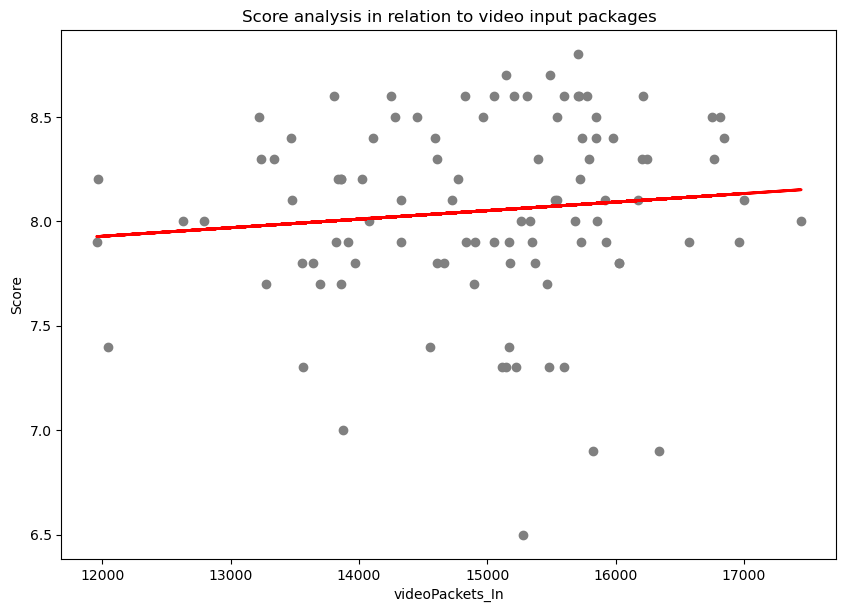

In [417]:
x = df['videoPackets_In'].values
y = df['score'].values
prev, MSE, R_2 = regressionLog(x, y)

plotarGraficoRegression(x, y, prev, "Score analysis in relation to video input packages", "videoPackets_In",'Score')

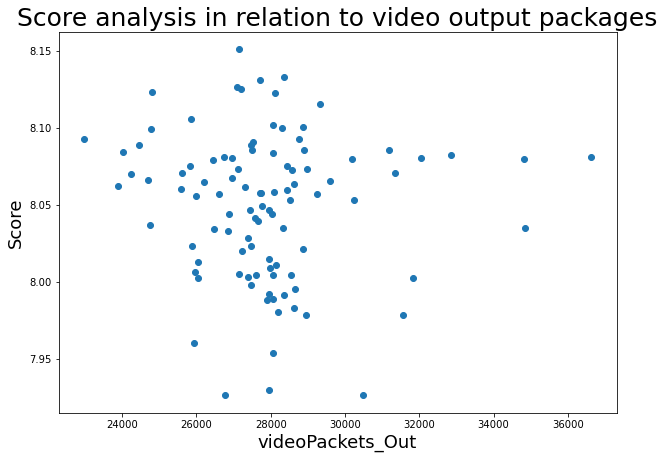

In [383]:
x0 = df['videoPackets_Out'].values
y0 = df['score'].values
prev0, MSE, R_2 = regressionLog(x, y)

plot2(x0, prev0, 'Score analysis in relation to video output packages','videoPackets_Out','Score')

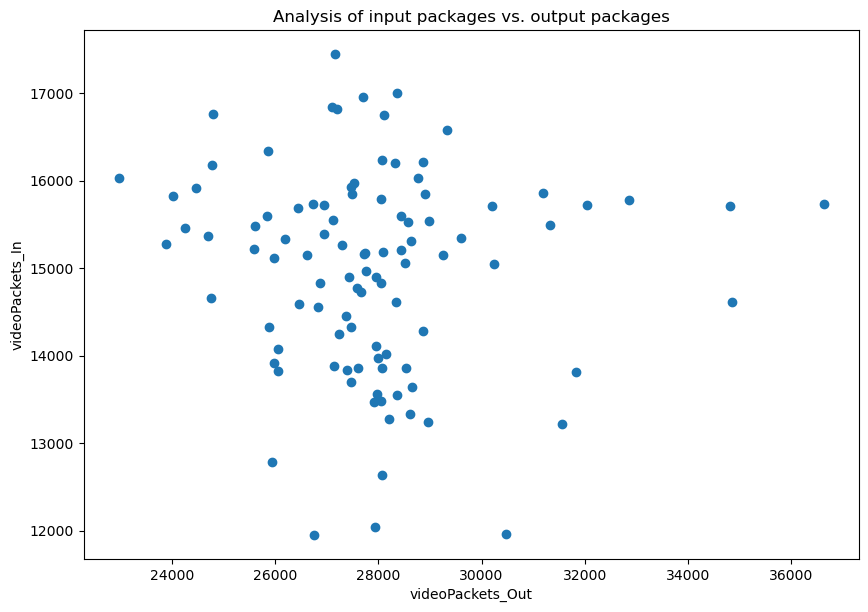

In [384]:
x1 = df['videoPackets_Out'].values
y1 = df['videoPackets_In'].values
graficScatter(x1, y1, 'Analysis of input packages vs. output packages', 'videoPackets_Out', 'videoPackets_In')

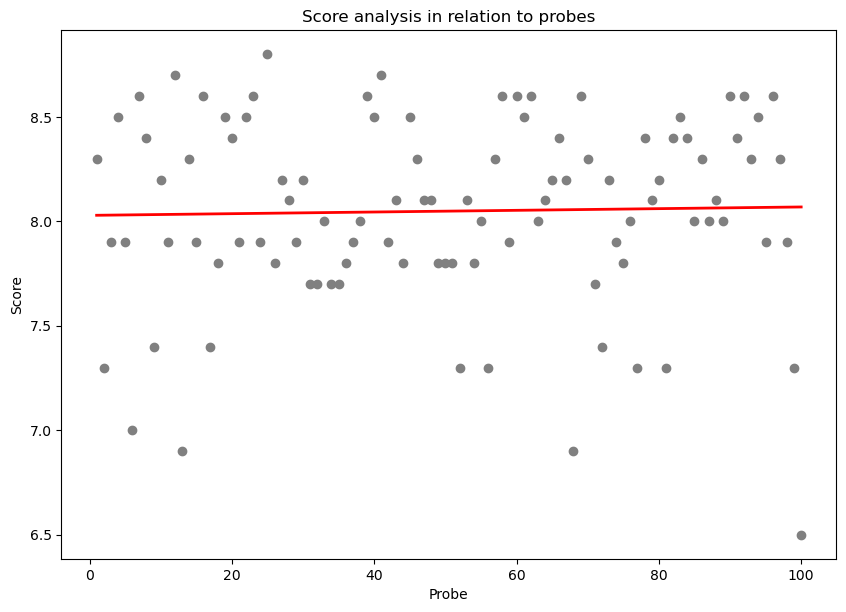

In [392]:
x2 = df['Probe Number'].values
y2 = df['score'].values
prev2, MSE, R_2 = regressionLog(x2, y2)

plotarGraficoRegression(x2, y2, prev2, "Score analysis in relation to probes", "Probe", 'Score')

Analysis Audio

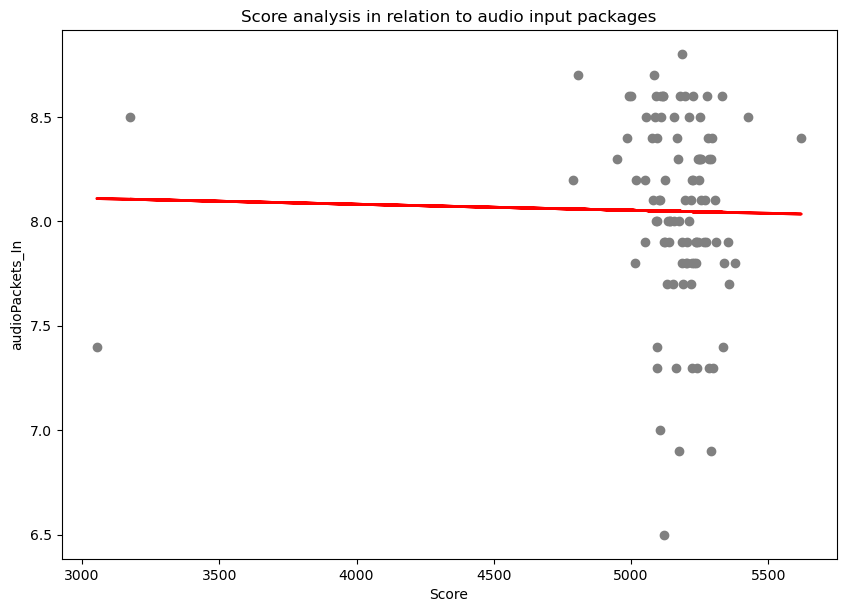

In [393]:
x3 = df['audioPackets_In'].values
y3 = df['score'].values
prev3, MSE, R_2 = regressionLog(x3, y3)

plotarGraficoRegression(x3, y3, prev3, "Score analysis in relation to audio input packages", "audioPackets_In", 'Score')

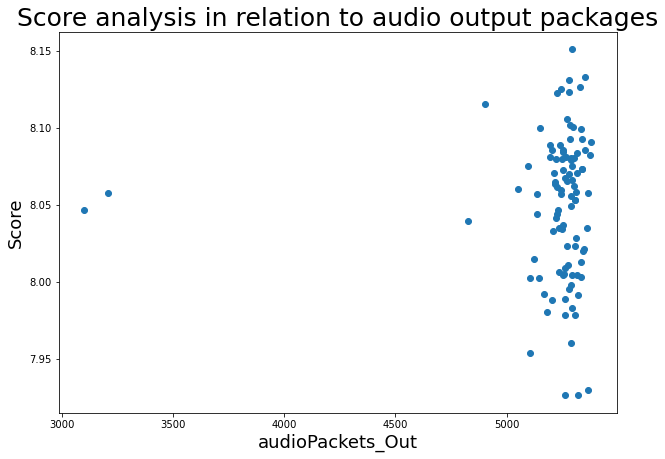

In [394]:
x4 = df['audioPackets_Out'].values
y4 = df['score'].values
prev4, MSE, R_2 = regressionLog(x, y)

plot2(x4, prev4, 'Score analysis in relation to audio output packages','audioPackets_Out','Score')

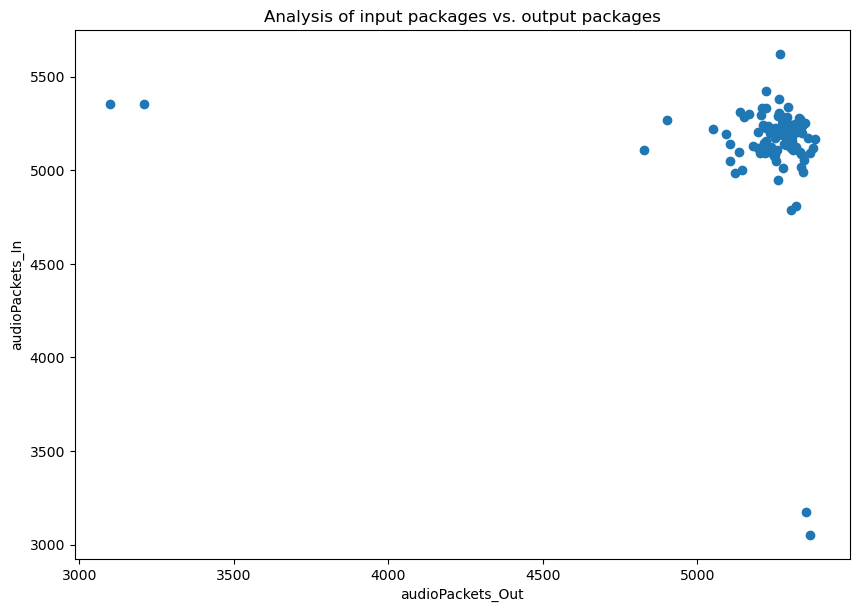

In [395]:
x5 = df['audioPackets_Out'].values
y5 = df['audioPackets_In'].values
graficScatter(x5, y5, 'Analysis of input packages vs. output packages', 'audioPackets_Out', 'audioPackets_In')

#### Score min records

In [415]:
text = str(probe99['Probe Number'].values[0])+' '
# # session
text += str(pb99_inSessionIdx.values[0])+' ' 
text += str(pb99_sessionNumber.values[0])+' ' 
text += str(pb99_videoPackets_in.values[0])+' '
text += str(pb99_videoPacketsLoss_in.values[0])+' ' 
text += str(pb99_videoPacketsLossPercent_In.values[0])+' '
text += str(pb99_videoPackets_out.values[0])+' ' 
text += str(pb99_videoPacketsLoss_out.values[0])+' '
text += str(pb99_videoPacketsLossPercent_out.values[0])+' ' 

# # videoBitrate
text += str(pb99_videoBitrate_in.values[0])+' ' 
text += str(pb99_videoBitrate_out.values[0])+' '
text += str(pb99_videoBitrate_in_Max.values[0])+' ' 
text += str(pb99_videoBitrate_in_min.values[0])+' ' 
text += str(pb99_videoBitrate_out_max.values[0])+' ' 
text += str(pb99_videoBitrate_out_min.values[0])+' ' 

# # videoJitter
text += str(pb99_videoJitter_in.values[0])+' ' 
text += str(pb99_videoJitter_in_max.values[0])+' ' 
text += str(pb99_videoJitter_out.values[0])+' ' 
text += str(pb99_videoJitter_out_max.values[0])+' ' 

# # videoRoundtrip 
text += str(pb99_videoRoundtrip.values[0])+' ' 
text += str(pb99_videoRoundtrip_Max.values[0])+' ' 

# # Audio Data
# # Packets
text += str(pb99_audioPackets_in.values[0])+' ' 
text += str(pb99_audioPacketsLoss_in.values[0])+' ' 
text += str(pb99_audioPacketsLossPercent_in.values[0])+' '
text += str(pb99_audioPackets_out.values[0])+' ' 
text += str(pb99_audioPacketsLoss_out.values[0])+' ' 
text += str(pb99_audioPacketsLossPercent_out.values[0])+' ' 

# # audioBitrate
text += str(pb99_audioBitrate_In.values[0])+' ' 
text += str(pb99_audioBitrate_Out.values[0])+' ' 
text += str(pb99_audioBitrate_in_max.values[0])+' '
text += str(pb99_audioBitrate_in_min.values[0])+' ' 
text += str(pb99_audioBitrate_out_max.values[0])+' ' 
text += str(pb99_audioBitrate_out_min.values[0])+' '

# # audioJitter
text += str(pb99_audioJitter_in.values[0])+' ' 
text += str(pb99_audioJitter_in_max.values[0])+' ' 
text += str(pb99_audioJitter_out.values[0])+' ' 
text += str(pb99_audioJitter_out_max.values[0])+' ' 

# # audioRoundtrip
text += str(pb99_audioRoundtrip.values[0])+' ' 
text += str(pb99_audioRoundtrip_max.values[0])+' ' 
text +='\n#################################################################\n'
print(text)

text = str(probe100['Probe Number'].values[0])+' '
# # session
text += str(pb100_inSessionIdx.values[0])+' ' 
text += str(pb100_sessionNumber.values[0])+' ' 
text += str(pb100_videoPackets_in.values[0])+' '
text += str(pb100_videoPacketsLoss_in.values[0])+' ' 
text += str(pb100_videoPacketsLossPercent_In.values[0])+' '
text += str(pb100_videoPackets_out.values[0])+' ' 
text += str(pb100_videoPacketsLoss_out.values[0])+' '
text += str(pb100_videoPacketsLossPercent_out.values[0])+' ' 

# # videoBitrate
text += str(pb100_videoBitrate_in.values[0])+' ' 
text += str(pb100_videoBitrate_out.values[0])+' '
text += str(pb100_videoBitrate_in_Max.values[0])+' ' 
text += str(pb100_videoBitrate_in_min.values[0])+' ' 
text += str(pb100_videoBitrate_out_max.values[0])+' ' 
text += str(pb100_videoBitrate_out_min.values[0])+' ' 

# # videoJitter
text += str(pb100_videoJitter_in.values[0])+' ' 
text += str(pb100_videoJitter_in_max.values[0])+' ' 
text += str(pb100_videoJitter_out.values[0])+' ' 
text += str(pb100_videoJitter_out_max.values[0])+' ' 

# # videoRoundtrip 
text += str(pb100_videoRoundtrip.values[0])+' ' 
text += str(pb100_videoRoundtrip_Max.values[0])+' ' 

# # Audio Data
# # Packets
text += str(pb100_audioPackets_in.values[0])+' ' 
text += str(pb100_audioPacketsLoss_in.values[0])+' ' 
text += str(pb100_audioPacketsLossPercent_in.values[0])+' '
text += str(pb100_audioPackets_out.values[0])+' ' 
text += str(pb100_audioPacketsLoss_out.values[0])+' ' 
text += str(pb100_audioPacketsLossPercent_out.values[0])+' ' 

# # audioBitrate
text += str(pb100_audioBitrate_In.values[0])+' ' 
text += str(pb100_audioBitrate_Out.values[0])+' ' 
text += str(pb100_audioBitrate_in_max.values[0])+' '
text += str(pb100_audioBitrate_in_min.values[0])+' ' 
text += str(pb100_audioBitrate_out_max.values[0])+' ' 
text += str(pb100_audioBitrate_out_min.values[0])+' '

# # audioJitter
text += str(pb100_audioJitter_in.values[0])+' ' 
text += str(pb100_audioJitter_in_max.values[0])+' ' 
text += str(pb100_audioJitter_out.values[0])+' ' 
text += str(pb100_audioJitter_out_max.values[0])+' ' 

# # audioRoundtrip
text += str(pb100_audioRoundtrip.values[0])+' ' 
text += str(pb100_audioRoundtrip_max.values[0])+' ' 
text +='\n#################################################################\n'
print(text)

99 1 50 13564 0 0 % 27963 4.0 0.04 % 958.14 1887.91 3757.76 90.15 4233.45 461.73 3107.3 11690.0 3.37 14.24 22.7 32 5299 0 0 % 5168 0 0 % 12.51 12.2 17.26 0.34 17.17 0.34 3.09 6 2.97 5.77 22.3 29 
#################################################################

100 2 50 15280 0 0 % 23880 3.33 0.04 % 1099.06 1526.89 2515.05 141.88 3829.73 0.0 2911.27 10236.0 3.75 18.84 21.74 31 5119 0 0 % 5303 0 0 % 12.17 12.52 16.87 0.26 17.74 1.81 3.31 6 2.83 6.85 21.78 31 
#################################################################



In [2]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file("Analise_dados_50_rom_100_probe.html")